*Generación de CVS con las estaciones -> metadata_estaciones.csv

In [ ]:
import pandas as pd
from pathlib import Path

mis_estaciones = {
    # 1. FACATATIVA
    '21201070': {
        'nombre': 'EL CORAZÓN FACATATIVA',
        'alt': 2845,
        'lat': 4.865361111,
        'lon': -74.28941667
    },
    # 2. TENJO
    '21201210': {
        'nombre': 'EL HATO TENJO',
        'alt': 3378,
        'lat': 4.866388889,
        'lon': -74.15386111
    },
    # 3. MOSQUERA (TIBATITÁ)
    '21205420': {
        'nombre': 'TIBAITATA MOSQUERA',
        'alt': 2543, 
        'lat': 4.688662,
        'lon': -74.205626
    },
    # 4. MADRID (BASE AÉREA)
    '21205770': {
        'nombre': 'BASE AEREA MADRID',
        'alt': 2550,
        'lat': 4.728805556, 
        'lon': -74.2725 
    },
    # 5. BOJACÁ (EL SALITRE)
    '21205870': {
        'nombre': 'EL SALITRE BOJACA',
        'alt': 2570,
        'lat': 4.738888889, 
        'lon': -74.33427778
    },
    # 6. MADRID (FLORES CHIBCHA)
    '21205880': {
        'nombre': 'FLORES CHIBCHA MADRID',
        'alt': 2550, 
        'lat': 4.789722222, 
        'lon': -74.26477778 
    },
    # 7. FACATATIVA (VILLA INÉS)
    '21205940': {
        'nombre': 'VILLA INÉS FACATATIVA',
        'alt': 2590, 
        'lat': 4.83211,
        'lon': -74.38056
    },
    # 8. SUBACHOQUE (TACHI)
    '21205960': {
        'nombre': 'TACHI SUBACHOQUE',
        'alt': 2650, 
        'lat': 4.939055556,
        'lon': -74.15258333
    },
    # 9. TENJO (GRANJA PROVIDENCIA)
    '21205980': {
        'nombre': 'GRANJA PROVIDENCIA TENJO',
        'alt': 2560, 
        'lat': 4.792388889,
        'lon': -74.20091667
    },
    # 10. MADRID (CASABLANCA)
    '21206060': {
        'nombre': 'CASABLANCA MADRID',
        'alt': 2575, 
        'lat': 4.717111111,
        'lon': -74.25333333
    },
    # 11. BOJACÁ (ACAPULCO)
    '21206280': {
        'nombre': 'ACAPULCO BOJACÁ',
        'alt': 2680, 
        'lat': 4.64823,
        'lon': -74.32035
    }
}
# 2. Configuración de Rutas (usando tu estructura de proyecto)
base_dir = Path.cwd()
dir_output_prediccion = base_dir / "Datos" / "datos_prediccion"
dir_output_prediccion.mkdir(parents=True, exist_ok=True) # Asegura que la carpeta exista

file_name = "metadata_estaciones.csv"
ruta_salida = dir_output_prediccion / file_name

# =================================================================
# 3. CONVERSIÓN Y GUARDADO A CSV (dict_a_csv)
# =================================================================

# Convertir el diccionario (donde la clave es el Código de Estación) a DataFrame
df_metadata = pd.DataFrame.from_dict(mis_estaciones, orient='index')

# Asignar el índice como una columna llamada 'CodigoEstacion'
df_metadata = df_metadata.reset_index().rename(columns={'index': 'CodigoEstacion'})

# Guardar el DataFrame como CSV
df_metadata.to_csv(ruta_salida, index=False, encoding='utf-8-sig')

print("✅ Metadata guardada exitosamente.")
print(f"   Archivo de salida: {file_name}")
print(f"   Ubicación: {ruta_salida.absolute()}")

# Mostrar el resultado (los primeros 5)
print("\n📋 Vista previa del DataFrame de Metadata:")
print(df_metadata.head())

✅ Metadata guardada exitosamente.
   Archivo de salida: metadata_estaciones.csv
   Ubicación: d:\Documentos\1especializacion\proyecto\proyecto_heladas_Madrid\Datos\datos_prediccion\metadata_estaciones.csv

📋 Vista previa del DataFrame de Metadata:
  CodigoEstacion                 nombre   alt       lat        lon
0       21201070  EL CORAZÓN FACATATIVA  2845  4.865361 -74.289417
1       21201210          EL HATO TENJO  3378  4.866389 -74.153861
2       21205420     TIBAITATA MOSQUERA  2543  4.688662 -74.205626
3       21205770      BASE AEREA MADRID  2550  4.728806 -74.272500
4       21205870      EL SALITRE BOJACA  2570  4.738889 -74.334278


Adicion de metadata a los dtaos para escoger el modelo. -> datos_estaciones_procesados_largo.csv

In [11]:
import pandas as pd
import numpy as np
from pathlib import Path
import sys

# ==================== CONFIGURACIÓN DE RUTAS Y ARCHIVOS ====================
base_dir = Path.cwd()

# Archivo de ENTRADA (Tu consolidado imputado)
file_path_input = base_dir / "Datos" / "datos_imputados" / "cundinamarca_imputado_v1.csv"
DATE_COL = 'Fecha' 

# Rutas de Metadata y Salida
dir_output = base_dir / "Datos" / "datos_prediccion" 
dir_output.mkdir(parents=True, exist_ok=True)
file_path_output = dir_output / "datos_estaciones_procesados_largo.csv"
file_path_metadata = dir_output / "metadata_estaciones.csv" 

# ==================== PASO 1: CREAR CATÁLOGO DE ESTACIONES (Cargando CSV) ====================
print("="*60)
print("PREPARACIÓN DE DATOS PARA MODELO DE HELADAS (ANCHO -> LARGO)")
print("="*60)

try:
    # 1. Leer el CSV de metadata
    # CRÍTICO: Aseguramos que la columna 'CodigoEstacion' se lea como STRING
    df_metadata = pd.read_csv(file_path_metadata, dtype={'CodigoEstacion': str})
    
    # 2. Convertir el DataFrame al formato de diccionario de diccionarios
    df_metadata = df_metadata.set_index('CodigoEstacion')
    catalogo_estaciones = df_metadata.to_dict('index')

    print(f"✅ Metadata cargada: {file_path_metadata.name}")
except FileNotFoundError:
    print(f"❌ ERROR CRÍTICO (Metadata): No se encontró el archivo: {file_path_metadata.name}")
    sys.exit(1)


# === PASO 2: CARGAR DATOS REALES ===
try:
    datos_originales = pd.read_csv(file_path_input)
    # Convertir explícitamente todos los nombres de columna a STRING (solución anterior)
    datos_originales.columns = datos_originales.columns.astype(str)
    
    print(f"📊 Datos originales cargados: {file_path_input.name}")
    print(f"   Registros: {len(datos_originales):,}")
except FileNotFoundError:
    print(f"❌ ERROR CRÍTICO (Datos Imputados): No se encontró el archivo: {file_path_input.name}")
    sys.exit(1)


# === PASO 3 y 4: TRANSFORMACIÓN, LIMPIEZA Y GENERACIÓN DE HELADA ===
print("\n🔄 Transformando datos a formato largo y generando variable HELADA...")

registros = []
columnas = datos_originales.columns.tolist() 
estaciones_codigos = catalogo_estaciones.keys() # Ahora son strings

for idx, row in datos_originales.iterrows():
    fecha = row[DATE_COL]
    
    for codigo in estaciones_codigos:
        # Aquí el código ya es STRING, gracias a dtype={'CodigoEstacion': str}
        info_estacion = catalogo_estaciones[codigo]
        alt, lat, lon, nombre_estacion = info_estacion['alt'], info_estacion['lat'], info_estacion['lon'], info_estacion['nombre']
        
        tmin, prec, tmax = np.nan, np.nan, np.nan
        
        for col in columnas:
            # Esta línea finalmente es segura: 'col' es str, y 'codigo' es str
            if col.endswith(codigo) or f'_{codigo}_' in col:
                if col.startswith('TMin'):
                    tmin = row.get(col, np.nan)
                elif col.startswith('TMax'):
                    tmax = row.get(col, np.nan)
                elif col.startswith('PREC'):
                    prec = row.get(col, np.nan)

        if pd.notna(tmin) or pd.notna(tmax) or pd.notna(prec):
            registro = {
                'FECHA': fecha, 'ESTACION_CODIGO': codigo, 'NOMBRE_ESTACION': nombre_estacion,
                'TMIN': tmin, 'TMAX': tmax, 'PREC': prec, 
                'ALT': alt, 'LAT': lat, 'LON': lon
            }
            registros.append(registro)

df_final = pd.DataFrame(registros)
df_final = df_final.dropna(subset=['TMIN'])
df_final['HELADA'] = (df_final['TMIN'] < 0).astype(int)

# === PASO 5: GUARDAR DATOS PROCESADOS ===
print("\n--- Guardando el archivo de salida ---")
try:
    df_final.to_csv(file_path_output, index=False)
    print(f"✅ Archivo guardado EXITOSAMENTE en: {file_path_output.absolute()}")
except Exception as e:
    print(f"❌ ERROR AL GUARDAR: Hubo un problema al escribir el archivo: {e}")
    sys.exit(1)
    
# === PASO 6: MOSTRAR RESUMEN ===
n_heladas = df_final['HELADA'].sum()
print(f"\n📋 RESUMEN DEL DATASET FINAL:")
print(f"   - Total registros (días/estación): {len(df_final):,}")
print(f"   - Rango de fechas: {df_final['FECHA'].min()} a {df_final['FECHA'].max()}")
print(f"   - Eventos de Helada (TMIN < 0): {n_heladas} ({n_heladas/len(df_final)*100:.2f}%)")
print("="*60)

PREPARACIÓN DE DATOS PARA MODELO DE HELADAS (ANCHO -> LARGO)
✅ Metadata cargada: metadata_estaciones.csv
📊 Datos originales cargados: cundinamarca_imputado_v1.csv
   Registros: 10,971

🔄 Transformando datos a formato largo y generando variable HELADA...

--- Guardando el archivo de salida ---
✅ Archivo guardado EXITOSAMENTE en: d:\Documentos\1especializacion\proyecto\proyecto_heladas_Madrid\Datos\datos_prediccion\datos_estaciones_procesados_largo.csv

📋 RESUMEN DEL DATASET FINAL:
   - Total registros (días/estación): 76,797
   - Rango de fechas: 1995-10-26 a 2025-11-07
   - Eventos de Helada (TMIN < 0): 489 (0.64%)


RIDGE GANADOR
✅ REGRESIÓN (temperatura): Ridge con Solo Madrid (R²=0.4081)
✅ CLASIFICACIÓN (helada): Ridge con Madrid+PREC+TMax (Recall=90.91%)

🚨 SISTEMA DE ALERTAS TEMPRANAS DE HELADAS - MADRID
Enfoque: Predicción a 1 día hacia el futuro

📊 Datos cargados: (10971, 16)
🎯 Target: TMin_21205880_FLORES_CHIBCHA_MADRID
   Rango: [-5.60°C, 13.00°C]
   Media: 6.33°C
   Desviación: 2.89°C

❄️ ANÁLISIS DE HELADAS:
   Total de heladas históricas: 229 (2.09%)
   Temperatura mínima registrada: -5.60°C
   Meses con más heladas:
      Ene: 104 heladas
      Feb: 53 heladas
      Dic: 25 heladas
      Mar: 19 heladas
      Sep: 15 heladas

⏰ PREPARANDO DATASET PARA PREDICCIÓN A 1 DÍA...

📉 Creando variables de rezago...
✔ Features temporales creados: 36
✔ Dataset después de limpiar NaN: (10941, 38)

🎯 Creando target futuro (temperatura de MAÑANA)...
✔ Target futuro creado
✔ Heladas en el futuro: 229 (2.09%)

📋 CONFIGURACIÓN FINAL:
   Features: 36
   Registros: 10940
   Período: 1995-11-25 a 2025-11-06

📊 DIVISIÓN TEMPORAL:
   Train: 8752 registros (1995-11-25 a 2019-11-10)
   Test:  2188 registros (2019-11-11 a 2025-11-06)
   Heladas en test

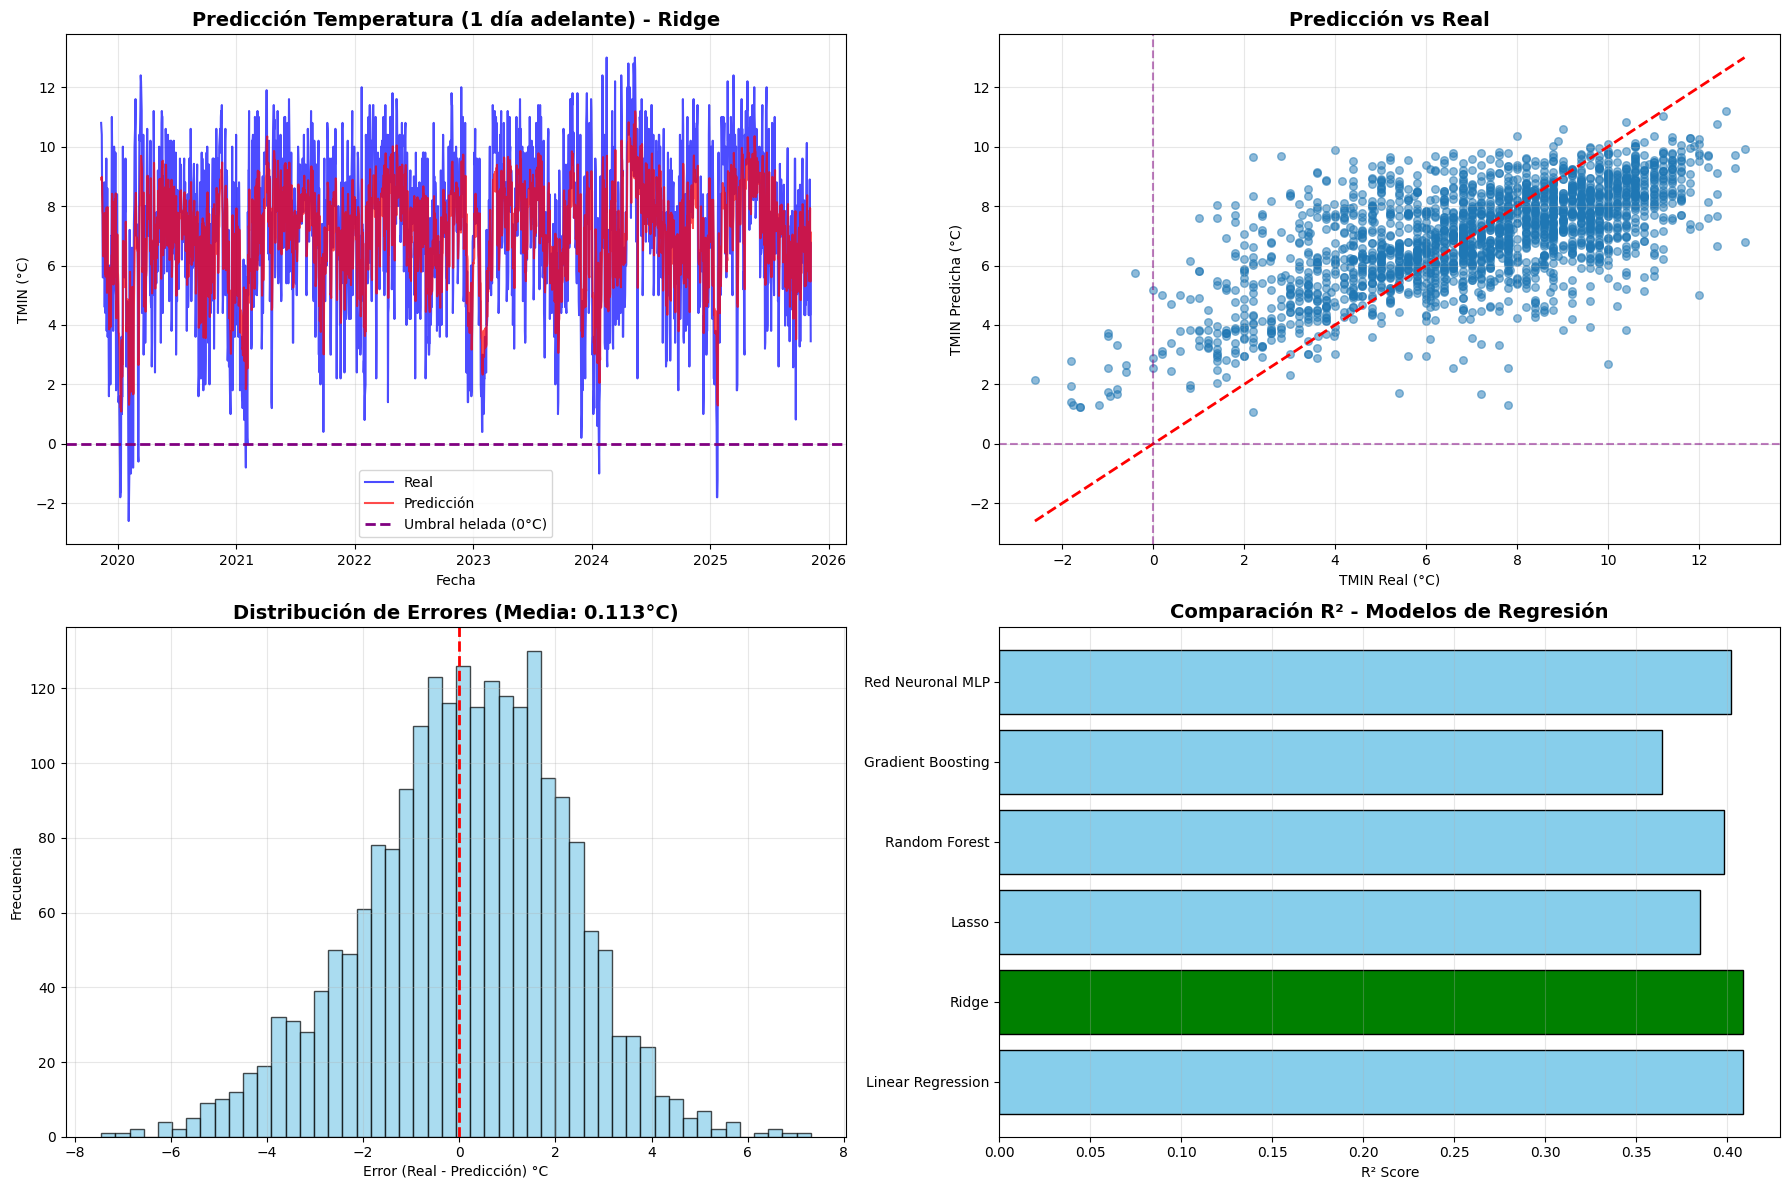

✔ d:\Documentos\1especializacion\proyecto\proyecto_heladas_Madrid\visualizaciones\sistema_alertas_regresion.png


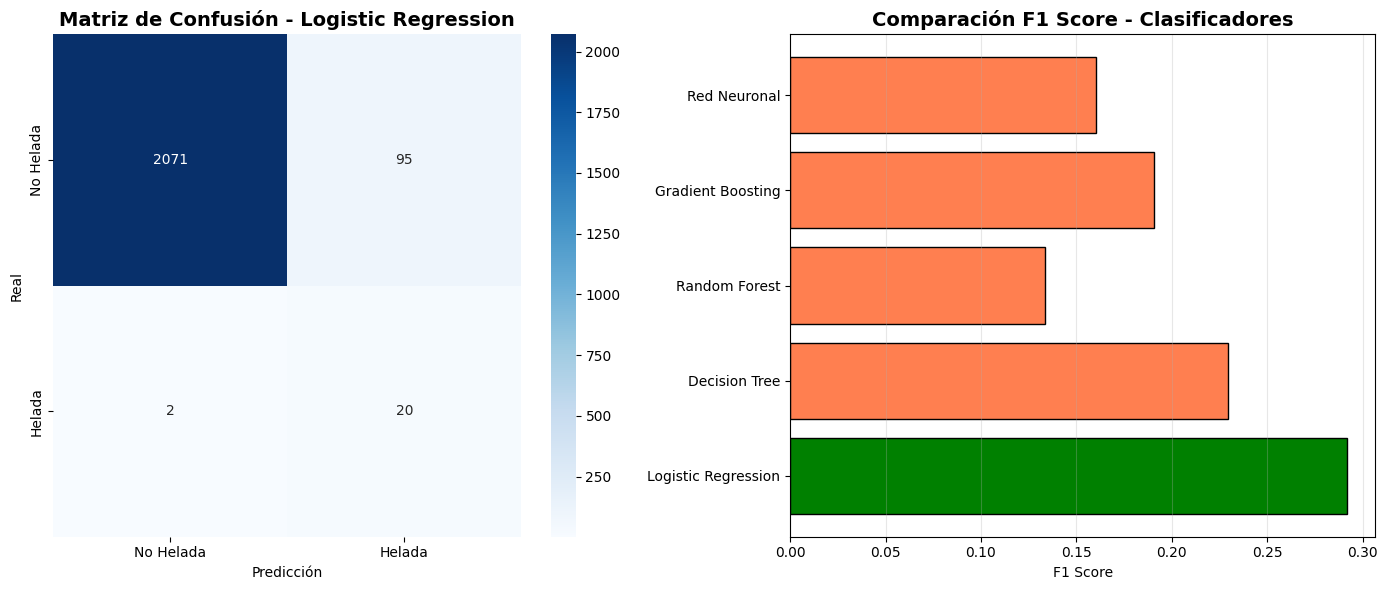

✔ d:\Documentos\1especializacion\proyecto\proyecto_heladas_Madrid\visualizaciones\sistema_alertas_clasificacion.png

🎯 TOP 15 FEATURES MÁS IMPORTANTES:
    Feature  Importancia
TMIN_diff_1     0.199618
 TMIN_lag_1     0.150229
  TMIN_ma_3     0.099759
TMIN_diff_7     0.030912
 TMIN_ma_14     0.027716
 DíaAño_cos     0.026911
 TMIN_min_3     0.025591
 TMIN_ma_30     0.025232
        Año     0.022939
  TMIN_ma_7     0.022831
 DíaAño_sin     0.021996
TMIN_std_30     0.021402
TMIN_lag_14     0.020551
TMIN_lag_21     0.020179
TMIN_lag_30     0.019369


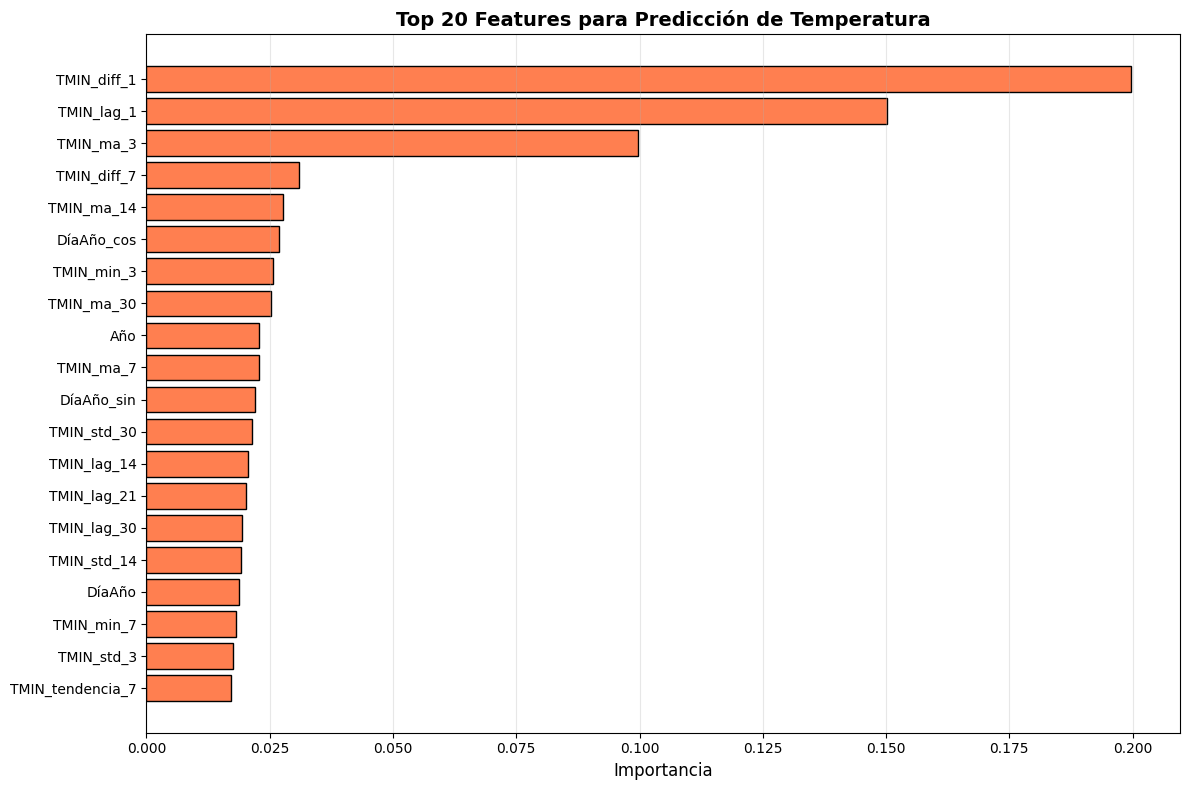

✔ d:\Documentos\1especializacion\proyecto\proyecto_heladas_Madrid\visualizaciones\importancia_features_alertas.png

💾 GUARDANDO RESULTADOS...
✔ d:\Documentos\1especializacion\proyecto\proyecto_heladas_Madrid\Datos\datos_prediccion\predicciones_temperatura_alertas.csv
✔ d:\Documentos\1especializacion\proyecto\proyecto_heladas_Madrid\Datos\datos_prediccion\alertas_heladas_clasificacion.csv
✔ d:\Documentos\1especializacion\proyecto\proyecto_heladas_Madrid\Datos\datos_prediccion\comparacion_modelos_regresion_alertas.csv
✔ d:\Documentos\1especializacion\proyecto\proyecto_heladas_Madrid\Datos\datos_prediccion\comparacion_clasificadores_heladas.csv
✔ d:\Documentos\1especializacion\proyecto\proyecto_heladas_Madrid\Datos\datos_prediccion\importancia_features_alertas.csv

🔍 ANÁLISIS DE CASOS CRÍTICOS

⚠️  FALSOS NEGATIVOS (Heladas NO detectadas): 2
   Fechas críticas:
      2020-03-04: Temp real = -0.40°C
      2021-01-29: Temp real = 0.00°C

⚠️  FALSOS POSITIVOS (Falsas alarmas): 95
   Fechas c

In [53]:
# ============================================================
#  SISTEMA DE ALERTAS DE HELADAS - ENFOQUE 3 OPTIMIZADO
#  Predicción a 1 día hacia el futuro (más realista)
# ============================================================

import pandas as pd
import numpy as np
from sklearn.model_selection import TimeSeriesSplit, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LogisticRegression
from sklearn.svm import SVR
from sklearn.metrics import (
    r2_score, mean_squared_error, mean_absolute_error,
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report
)
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# ============================================================
# CONFIGURACIÓN
# ============================================================
base_dir = Path.cwd()
datos_dir = base_dir / "Datos"
prediccion_dir = datos_dir / "datos_prediccion"
viz_dir = base_dir / "visualizaciones"

prediccion_dir.mkdir(parents=True, exist_ok=True)
viz_dir.mkdir(parents=True, exist_ok=True)

print("="*80)
print("🚨 SISTEMA DE ALERTAS TEMPRANAS DE HELADAS - MADRID")
print("="*80)
print("Enfoque: Predicción a 1 día hacia el futuro")
print("="*80)

# ============================================================
# CARGAR DATOS
# ============================================================
file_path = datos_dir / "datos_imputados" / "cundinamarca_imputado_v1.csv"
df = pd.read_csv(file_path)
df["Fecha"] = pd.to_datetime(df["Fecha"])

target = "TMin_21205880_FLORES_CHIBCHA_MADRID"

print(f"\n📊 Datos cargados: {df.shape}")
print(f"🎯 Target: {target}")
print(f"   Rango: [{df[target].min():.2f}°C, {df[target].max():.2f}°C]")
print(f"   Media: {df[target].mean():.2f}°C")
print(f"   Desviación: {df[target].std():.2f}°C")

# ============================================================
# ANÁLISIS DE HELADAS
# ============================================================
heladas = (df[target] <= 0).sum()
heladas_pct = (heladas / len(df)) * 100

print(f"\n❄️ ANÁLISIS DE HELADAS:")
print(f"   Total de heladas históricas: {heladas} ({heladas_pct:.2f}%)")
print(f"   Temperatura mínima registrada: {df[target].min():.2f}°C")
print(f"   Meses con más heladas:")

df_temp = df.copy()
df_temp['Mes'] = df_temp['Fecha'].dt.month
df_temp['Helada'] = (df_temp[target] <= 0).astype(int)
heladas_por_mes = df_temp.groupby('Mes')['Helada'].sum().sort_values(ascending=False)
for mes, count in heladas_por_mes.head(5).items():
    mes_nombre = ['Ene','Feb','Mar','Abr','May','Jun','Jul','Ago','Sep','Oct','Nov','Dic'][mes-1]
    print(f"      {mes_nombre}: {count} heladas")

# ============================================================
# PREPARAR DATASET PARA PREDICCIÓN FUTURA
# ============================================================
print("\n⏰ PREPARANDO DATASET PARA PREDICCIÓN A 1 DÍA...")

df_modelo = df[['Fecha', target]].copy()

# Features temporales
df_modelo['Año'] = df_modelo['Fecha'].dt.year
df_modelo['Mes'] = df_modelo['Fecha'].dt.month
df_modelo['DíaAño'] = df_modelo['Fecha'].dt.dayofyear
df_modelo['Trimestre'] = df_modelo['Fecha'].dt.quarter
df_modelo['DiaSemana'] = df_modelo['Fecha'].dt.dayofweek

# Features cíclicas (estacionalidad)
df_modelo['Mes_sin'] = np.sin(2 * np.pi * df_modelo['Mes'] / 12)
df_modelo['Mes_cos'] = np.cos(2 * np.pi * df_modelo['Mes'] / 12)
df_modelo['DíaAño_sin'] = np.sin(2 * np.pi * df_modelo['DíaAño'] / 365)
df_modelo['DíaAño_cos'] = np.cos(2 * np.pi * df_modelo['DíaAño'] / 365)

# ============================================================
# REZAGOS TEMPORALES (CLAVE: usar shift para evitar leakage)
# ============================================================
print("\n📉 Creando variables de rezago...")

# Rezagos simples (temperaturas de días anteriores)
for lag in [1, 2, 3, 7, 14, 21, 30]:
    df_modelo[f'TMIN_lag_{lag}'] = df_modelo[target].shift(lag)

# Promedios móviles (IMPORTANTE: aplicar shift primero)
for window in [3, 7, 14, 30]:
    df_modelo[f'TMIN_ma_{window}'] = df_modelo[target].shift(1).rolling(window=window).mean()
    df_modelo[f'TMIN_std_{window}'] = df_modelo[target].shift(1).rolling(window=window).std()
    df_modelo[f'TMIN_min_{window}'] = df_modelo[target].shift(1).rolling(window=window).min()
    df_modelo[f'TMIN_max_{window}'] = df_modelo[target].shift(1).rolling(window=window).max()

# Diferencias (cambios diarios)
df_modelo['TMIN_diff_1'] = df_modelo[target].diff(1)
df_modelo['TMIN_diff_7'] = df_modelo[target].diff(7)

# Tendencia reciente (pendiente de los últimos 7 días)
def calcular_tendencia(serie):
    if len(serie) < 7:
        return 0
    x = np.arange(len(serie))
    y = serie.values
    if len(x) > 0 and len(y) > 0:
        coef = np.polyfit(x, y, 1)[0]
        return coef
    return 0

df_modelo['TMIN_tendencia_7'] = df_modelo[target].shift(1).rolling(window=7).apply(calcular_tendencia, raw=False)

# Variabilidad reciente
df_modelo['TMIN_rango_7'] = df_modelo[f'TMIN_max_7'] - df_modelo[f'TMIN_min_7']

# Eliminar filas con NaN
df_modelo = df_modelo.dropna().reset_index(drop=True)

print(f"✔ Features temporales creados: {len([col for col in df_modelo.columns if col not in ['Fecha', target]])}")
print(f"✔ Dataset después de limpiar NaN: {df_modelo.shape}")

# ============================================================
# CREAR TARGET FUTURO (predicción a 1 día)
# ============================================================
print("\n🎯 Creando target futuro (temperatura de MAÑANA)...")

# CLAVE: Predecir la temperatura del DÍA SIGUIENTE
df_modelo['TMIN_FUTURO'] = df_modelo[target].shift(-1)

# Variable binaria: ¿Habrá helada mañana?
df_modelo['HELADA_FUTURO'] = (df_modelo['TMIN_FUTURO'] <= 0).astype(int)

# Eliminar última fila (no tiene futuro)
df_modelo = df_modelo[:-1].reset_index(drop=True)

print(f"✔ Target futuro creado")
print(f"✔ Heladas en el futuro: {df_modelo['HELADA_FUTURO'].sum()} ({(df_modelo['HELADA_FUTURO'].sum()/len(df_modelo))*100:.2f}%)")

# ============================================================
# DEFINIR FEATURES Y TARGETS
# ============================================================
feature_cols = [col for col in df_modelo.columns 
                if col not in ['Fecha', target, 'TMIN_FUTURO', 'HELADA_FUTURO']]

X = df_modelo[feature_cols]
y_reg = df_modelo['TMIN_FUTURO']  # Regresión: temperatura de mañana
y_clf = df_modelo['HELADA_FUTURO']  # Clasificación: ¿helada sí/no?
fechas = df_modelo['Fecha']

print(f"\n📋 CONFIGURACIÓN FINAL:")
print(f"   Features: {len(feature_cols)}")
print(f"   Registros: {len(X)}")
print(f"   Período: {fechas.min().date()} a {fechas.max().date()}")

# ============================================================
# SPLIT TEMPORAL (80% train, 20% test)
# ============================================================
split_idx = int(len(X) * 0.8)

X_train, X_test = X[:split_idx], X[split_idx:]
y_train_reg, y_test_reg = y_reg[:split_idx], y_reg[split_idx:]
y_train_clf, y_test_clf = y_clf[:split_idx], y_clf[split_idx:]
fechas_train, fechas_test = fechas[:split_idx], fechas[split_idx:]

print(f"\n📊 DIVISIÓN TEMPORAL:")
print(f"   Train: {len(X_train)} registros ({fechas_train.min().date()} a {fechas_train.max().date()})")
print(f"   Test:  {len(X_test)} registros ({fechas_test.min().date()} a {fechas_test.max().date()})")
print(f"   Heladas en test: {y_test_clf.sum()} ({(y_test_clf.sum()/len(y_test_clf))*100:.2f}%)")

# ============================================================
# ESCALAMIENTO
# ============================================================
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("✔ Escalamiento aplicado")

# ============================================================
# ENTRENAR MODELOS DE REGRESIÓN
# ============================================================
print("\n" + "="*80)
print("🤖 MODELOS DE REGRESIÓN (Predicción de Temperatura)")
print("="*80)

modelos_regresion = {
    'Linear Regression': LinearRegression(),
    'Ridge': Ridge(alpha=1.0),
    'Lasso': Lasso(alpha=0.1, max_iter=5000),
    'Random Forest': RandomForestRegressor(
        n_estimators=300,
        max_depth=15,
        min_samples_split=10,
        min_samples_leaf=5,
        random_state=42,
        n_jobs=-1
    ),
    'Gradient Boosting': GradientBoostingRegressor(
        n_estimators=300,
        max_depth=5,
        learning_rate=0.05,
        random_state=42
    ),
    'Red Neuronal MLP': MLPRegressor(
        hidden_layer_sizes=(100, 50, 25),
        activation='relu',
        solver='adam',
        max_iter=2000,
        random_state=42,
        early_stopping=True,
        validation_fraction=0.1
    )
}

resultados_reg = {}

for nombre, modelo in modelos_regresion.items():
    print(f"\n⏳ Entrenando {nombre}...")
    
    modelo.fit(X_train_scaled, y_train_reg)
    
    y_pred_train = modelo.predict(X_train_scaled)
    y_pred_test = modelo.predict(X_test_scaled)
    
    r2_train = r2_score(y_train_reg, y_pred_train)
    r2_test = r2_score(y_test_reg, y_pred_test)
    rmse = np.sqrt(mean_squared_error(y_test_reg, y_pred_test))
    mae = mean_absolute_error(y_test_reg, y_pred_test)
    
    resultados_reg[nombre] = {
        'modelo': modelo,
        'r2_train': r2_train,
        'r2_test': r2_test,
        'rmse': rmse,
        'mae': mae,
        'predicciones': y_pred_test,
        'overfitting': r2_train - r2_test
    }
    
    print(f"  ✓ R² Train: {r2_train:.4f}")
    print(f"  ✓ R² Test:  {r2_test:.4f}")
    print(f"  ✓ RMSE:     {rmse:.4f}°C")
    print(f"  ✓ MAE:      {mae:.4f}°C")
    print(f"  ✓ Overfitting: {r2_train - r2_test:.4f}")

# ============================================================
# RANKING REGRESIÓN
# ============================================================
print("\n" + "="*80)
print("📊 RANKING DE MODELOS DE REGRESIÓN")
print("="*80)

ranking_reg = sorted(resultados_reg.items(), key=lambda x: x[1]['r2_test'], reverse=True)
for i, (nombre, metricas) in enumerate(ranking_reg, 1):
    print(f"{i}. {nombre:20s} | R²: {metricas['r2_test']:.4f} | RMSE: {metricas['rmse']:.4f}°C | MAE: {metricas['mae']:.4f}°C")

mejor_reg_nombre = ranking_reg[0][0]
mejor_reg = resultados_reg[mejor_reg_nombre]

print(f"\n🏆 MEJOR MODELO DE REGRESIÓN: {mejor_reg_nombre}")
print(f"   R² Test: {mejor_reg['r2_test']:.4f}")
print(f"   RMSE: {mejor_reg['rmse']:.4f}°C")
print(f"   MAE: {mejor_reg['mae']:.4f}°C")

# ============================================================
# CLASIFICADOR DE HELADAS
# ============================================================
print("\n" + "="*80)
print("❄️ CLASIFICADORES DE HELADAS (¿Habrá helada mañana?)")
print("="*80)

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier

modelos_clf = {
    'Logistic Regression': LogisticRegression(max_iter=2000, random_state=42, class_weight='balanced'),
    'Decision Tree': DecisionTreeClassifier(max_depth=10, random_state=42, class_weight='balanced'),
    'Random Forest': RandomForestClassifier(n_estimators=300, max_depth=15, random_state=42, class_weight='balanced', n_jobs=-1),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=200, max_depth=5, random_state=42),
    'Red Neuronal': MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=2000, random_state=42, early_stopping=True)
}

resultados_clf = {}

for nombre, modelo in modelos_clf.items():
    print(f"\n⏳ Entrenando {nombre}...")
    
    modelo.fit(X_train_scaled, y_train_clf)
    y_pred_clf = modelo.predict(X_test_scaled)
    
    acc = accuracy_score(y_test_clf, y_pred_clf)
    prec = precision_score(y_test_clf, y_pred_clf, zero_division=0)
    rec = recall_score(y_test_clf, y_pred_clf, zero_division=0)
    f1 = f1_score(y_test_clf, y_pred_clf, zero_division=0)
    
    resultados_clf[nombre] = {
        'modelo': modelo,
        'accuracy': acc,
        'precision': prec,
        'recall': rec,
        'f1': f1,
        'predicciones': y_pred_clf
    }
    
    print(f"  ✓ Accuracy:  {acc:.4f}")
    print(f"  ✓ Precision: {prec:.4f} (de las alertas, cuántas son correctas)")
    print(f"  ✓ Recall:    {rec:.4f} (de las heladas reales, cuántas detectamos)")
    print(f"  ✓ F1 Score:  {f1:.4f}")

# ============================================================
# RANKING CLASIFICACIÓN
# ============================================================
print("\n" + "="*80)
print("📊 RANKING DE CLASIFICADORES DE HELADAS")
print("="*80)

ranking_clf = sorted(resultados_clf.items(), key=lambda x: x[1]['f1'], reverse=True)
for i, (nombre, metricas) in enumerate(ranking_clf, 1):
    print(f"{i}. {nombre:20s} | F1: {metricas['f1']:.4f} | Precision: {metricas['precision']:.4f} | Recall: {metricas['recall']:.4f}")

mejor_clf_nombre = ranking_clf[0][0]
mejor_clf = resultados_clf[mejor_clf_nombre]

print(f"\n🏆 MEJOR CLASIFICADOR: {mejor_clf_nombre}")
print(f"   F1 Score: {mejor_clf['f1']:.4f}")
print(f"   Precision: {mejor_clf['precision']:.4f}")
print(f"   Recall: {mejor_clf['recall']:.4f}")

# Matriz de confusión
cm = confusion_matrix(y_test_clf, mejor_clf['predicciones'])
print(f"\n📊 MATRIZ DE CONFUSIÓN ({mejor_clf_nombre}):")
print(f"   No Helada Real → No Helada Pred: {cm[0,0]} ✓")
print(f"   No Helada Real → Helada Pred:    {cm[0,1]} (Falsas Alarmas)")
print(f"   Helada Real    → No Helada Pred: {cm[1,0]} (Heladas NO detectadas ⚠️)")
print(f"   Helada Real    → Helada Pred:    {cm[1,1]} (Heladas detectadas ✓)")

# ============================================================
# VISUALIZACIONES
# ============================================================
print("\n" + "="*80)
print("📈 GENERANDO VISUALIZACIONES...")
print("="*80)

# Gráfico 1: Predicciones de temperatura
fig, axes = plt.subplots(2, 2, figsize=(18, 12))

# Serie temporal
axes[0, 0].plot(fechas_test.values, y_test_reg.values, label='Real', linewidth=1.5, alpha=0.7, color='blue')
axes[0, 0].plot(fechas_test.values, mejor_reg['predicciones'], label='Predicción', linewidth=1.5, alpha=0.7, color='red')
axes[0, 0].axhline(y=0, color='purple', linestyle='--', linewidth=2, label='Umbral helada (0°C)')
axes[0, 0].set_title(f'Predicción Temperatura (1 día adelante) - {mejor_reg_nombre}', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('Fecha')
axes[0, 0].set_ylabel('TMIN (°C)')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# Scatter plot
axes[0, 1].scatter(y_test_reg, mejor_reg['predicciones'], alpha=0.5, s=30)
axes[0, 1].plot([y_test_reg.min(), y_test_reg.max()], [y_test_reg.min(), y_test_reg.max()], 'r--', lw=2)
axes[0, 1].axvline(x=0, color='purple', linestyle='--', alpha=0.5)
axes[0, 1].axhline(y=0, color='purple', linestyle='--', alpha=0.5)
axes[0, 1].set_title('Predicción vs Real', fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel('TMIN Real (°C)')
axes[0, 1].set_ylabel('TMIN Predicha (°C)')
axes[0, 1].grid(True, alpha=0.3)

# Distribución de errores
errores = y_test_reg.values - mejor_reg['predicciones']
axes[1, 0].hist(errores, bins=50, edgecolor='black', alpha=0.7, color='skyblue')
axes[1, 0].axvline(0, color='r', linestyle='--', linewidth=2)
axes[1, 0].set_title(f'Distribución de Errores (Media: {errores.mean():.3f}°C)', fontsize=14, fontweight='bold')
axes[1, 0].set_xlabel('Error (Real - Predicción) °C')
axes[1, 0].set_ylabel('Frecuencia')
axes[1, 0].grid(True, alpha=0.3)

# Comparación modelos
nombres_modelos = list(resultados_reg.keys())
r2_valores = [resultados_reg[m]['r2_test'] for m in nombres_modelos]
colores = ['green' if m == mejor_reg_nombre else 'skyblue' for m in nombres_modelos]

axes[1, 1].barh(nombres_modelos, r2_valores, color=colores, edgecolor='black')
axes[1, 1].set_title('Comparación R² - Modelos de Regresión', fontsize=14, fontweight='bold')
axes[1, 1].set_xlabel('R² Score')
axes[1, 1].grid(True, alpha=0.3, axis='x')

plt.tight_layout()
plt.savefig(viz_dir / 'sistema_alertas_regresion.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"✔ {viz_dir / 'sistema_alertas_regresion.png'}")

# Gráfico 2: Matriz de confusión
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Matriz de confusión
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[0],
            xticklabels=['No Helada', 'Helada'],
            yticklabels=['No Helada', 'Helada'])
axes[0].set_title(f'Matriz de Confusión - {mejor_clf_nombre}', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Real')
axes[0].set_xlabel('Predicción')

# Comparación clasificadores
nombres_clf = list(resultados_clf.keys())
f1_valores = [resultados_clf[m]['f1'] for m in nombres_clf]
colores_clf = ['green' if m == mejor_clf_nombre else 'coral' for m in nombres_clf]

axes[1].barh(nombres_clf, f1_valores, color=colores_clf, edgecolor='black')
axes[1].set_title('Comparación F1 Score - Clasificadores', fontsize=14, fontweight='bold')
axes[1].set_xlabel('F1 Score')
axes[1].grid(True, alpha=0.3, axis='x')

plt.tight_layout()
plt.savefig(viz_dir / 'sistema_alertas_clasificacion.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"✔ {viz_dir / 'sistema_alertas_clasificacion.png'}")

# ============================================================
# IMPORTANCIA DE FEATURES
# ============================================================
if 'Random Forest' in resultados_reg:
    rf_modelo = resultados_reg['Random Forest']['modelo']
    importancias = pd.DataFrame({
        'Feature': feature_cols,
        'Importancia': rf_modelo.feature_importances_
    }).sort_values('Importancia', ascending=False)
    
    print("\n🎯 TOP 15 FEATURES MÁS IMPORTANTES:")
    print(importancias.head(15).to_string(index=False))
    
    plt.figure(figsize=(12, 8))
    top_features = importancias.head(20)
    plt.barh(top_features['Feature'], top_features['Importancia'], color='coral', edgecolor='black')
    plt.xlabel('Importancia', fontsize=12)
    plt.title('Top 20 Features para Predicción de Temperatura', fontsize=14, fontweight='bold')
    plt.gca().invert_yaxis()
    plt.grid(True, alpha=0.3, axis='x')
    plt.tight_layout()
    plt.savefig(viz_dir / 'importancia_features_alertas.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    print(f"✔ {viz_dir / 'importancia_features_alertas.png'}")

# ============================================================
# GUARDAR RESULTADOS
# ============================================================
print("\n" + "="*80)
print("💾 GUARDANDO RESULTADOS...")
print("="*80)

# Predicciones regresión
pred_reg_df = pd.DataFrame({
    'Fecha': fechas_test.values,
    'TMIN_Real': y_test_reg.values,
    'TMIN_Predicha': mejor_reg['predicciones'],
    'Error': y_test_reg.values - mejor_reg['predicciones'],
    'Error_Abs': np.abs(y_test_reg.values - mejor_reg['predicciones']),
    'Helada_Real': (y_test_reg.values <= 0).astype(int),
    'Helada_Predicha': (mejor_reg['predicciones'] <= 0).astype(int)
})
pred_reg_df.to_csv(prediccion_dir / 'predicciones_temperatura_alertas.csv', index=False)
print(f"✔ {prediccion_dir / 'predicciones_temperatura_alertas.csv'}")

# Predicciones clasificación
pred_clf_df = pd.DataFrame({
    'Fecha': fechas_test.values,
    'Helada_Real': y_test_clf.values,
    'Helada_Predicha': mejor_clf['predicciones'],
    'Alerta': ['⚠️ ALERTA HELADA' if pred == 1 else 'Sin alerta' for pred in mejor_clf['predicciones']],
    'Resultado': ['Correcto ✓' if real == pred else 'Error ✗' 
                  for real, pred in zip(y_test_clf.values, mejor_clf['predicciones'])]
})
pred_clf_df.to_csv(prediccion_dir / 'alertas_heladas_clasificacion.csv', index=False)
print(f"✔ {prediccion_dir / 'alertas_heladas_clasificacion.csv'}")

# Comparación de modelos regresión
comp_reg_df = pd.DataFrame([
    {
        'Modelo': nombre,
        'R2_Train': metricas['r2_train'],
        'R2_Test': metricas['r2_test'],
        'RMSE': metricas['rmse'],
        'MAE': metricas['mae'],
        'Overfitting': metricas['overfitting']
    }
    for nombre, metricas in resultados_reg.items()
]).sort_values('R2_Test', ascending=False)
comp_reg_df.to_csv(prediccion_dir / 'comparacion_modelos_regresion_alertas.csv', index=False)
print(f"✔ {prediccion_dir / 'comparacion_modelos_regresion_alertas.csv'}")

# Comparación clasificadores
comp_clf_df = pd.DataFrame([
    {
        'Modelo': nombre,
        'Accuracy': metricas['accuracy'],
        'Precision': metricas['precision'],
        'Recall': metricas['recall'],
        'F1_Score': metricas['f1']
    }
    for nombre, metricas in resultados_clf.items()
]).sort_values('F1_Score', ascending=False)
comp_clf_df.to_csv(prediccion_dir / 'comparacion_clasificadores_heladas.csv', index=False)
print(f"✔ {prediccion_dir / 'comparacion_clasificadores_heladas.csv'}")

# Importancia de features
if 'Random Forest' in resultados_reg:
    importancias.to_csv(prediccion_dir / 'importancia_features_alertas.csv', index=False)
    print(f"✔ {prediccion_dir / 'importancia_features_alertas.csv'}")

# ============================================================
# ANÁLISIS DE CASOS CRÍTICOS
# ============================================================
print("\n" + "="*80)
print("🔍 ANÁLISIS DE CASOS CRÍTICOS")
print("="*80)

# Casos donde hubo helada pero NO se detectó (Falsos Negativos)
falsos_negativos = pred_clf_df[(pred_clf_df['Helada_Real'] == 1) & (pred_clf_df['Helada_Predicha'] == 0)]
if len(falsos_negativos) > 0:
    print(f"\n⚠️  FALSOS NEGATIVOS (Heladas NO detectadas): {len(falsos_negativos)}")
    print("   Fechas críticas:")
    for idx, row in falsos_negativos.head(5).iterrows():
        fecha = row['Fecha']
        temp_real = y_test_reg.iloc[pred_clf_df.index.get_loc(idx)]
        print(f"      {pd.to_datetime(fecha).date()}: Temp real = {temp_real:.2f}°C")
else:
    print("\n✅ NO hubo falsos negativos - Todas las heladas fueron detectadas")

# Casos de falsas alarmas (Falsos Positivos)
falsos_positivos = pred_clf_df[(pred_clf_df['Helada_Real'] == 0) & (pred_clf_df['Helada_Predicha'] == 1)]
if len(falsos_positivos) > 0:
    print(f"\n⚠️  FALSOS POSITIVOS (Falsas alarmas): {len(falsos_positivos)}")
    print("   Fechas con falsas alarmas:")
    for idx, row in falsos_positivos.head(5).iterrows():
        fecha = row['Fecha']
        temp_real = y_test_reg.iloc[pred_clf_df.index.get_loc(idx)]
        print(f"      {pd.to_datetime(fecha).date()}: Temp real = {temp_real:.2f}°C (predicha como helada)")
else:
    print("\n✅ NO hubo falsas alarmas")

# ============================================================
# REPORTE EJECUTIVO
# ============================================================
print("\n" + "="*80)
print("📋 REPORTE EJECUTIVO - SISTEMA DE ALERTAS DE HELADAS")
print("="*80)

print(f"\n🎯 OBJETIVO:")
print(f"   Predecir con 1 día de anticipación si habrá helada en Madrid, Cundinamarca")
print(f"   Umbral de helada: Temperatura mínima ≤ 0°C")

print(f"\n📊 DATOS UTILIZADOS:")
print(f"   Período total: {fechas.min().date()} a {fechas.max().date()}")
print(f"   Total de registros: {len(df_modelo)}")
print(f"   Heladas históricas: {df_modelo['HELADA_FUTURO'].sum()} ({(df_modelo['HELADA_FUTURO'].sum()/len(df_modelo))*100:.2f}%)")
print(f"   Features utilizados: {len(feature_cols)}")

print(f"\n🤖 MEJOR MODELO DE REGRESIÓN:")
print(f"   Modelo: {mejor_reg_nombre}")
print(f"   R² Score: {mejor_reg['r2_test']:.4f}")
print(f"   RMSE: {mejor_reg['rmse']:.4f}°C")
print(f"   MAE: {mejor_reg['mae']:.4f}°C")
print(f"   Interpretación: El modelo explica el {mejor_reg['r2_test']*100:.2f}% de la variabilidad")
print(f"                   Error promedio de {mejor_reg['mae']:.2f}°C en las predicciones")

print(f"\n❄️ MEJOR CLASIFICADOR DE HELADAS:")
print(f"   Modelo: {mejor_clf_nombre}")
print(f"   Accuracy: {mejor_clf['accuracy']:.4f} ({mejor_clf['accuracy']*100:.2f}% de predicciones correctas)")
print(f"   Precision: {mejor_clf['precision']:.4f} (de las alertas emitidas, {mejor_clf['precision']*100:.2f}% son correctas)")
print(f"   Recall: {mejor_clf['recall']:.4f} (de las heladas reales, se detectan {mejor_clf['recall']*100:.2f}%)")
print(f"   F1 Score: {mejor_clf['f1']:.4f}")

print(f"\n📈 DESEMPEÑO EN PERÍODO DE PRUEBA:")
print(f"   Heladas reales: {y_test_clf.sum()}")
print(f"   Heladas detectadas: {cm[1,1]}")
print(f"   Heladas NO detectadas: {cm[1,0]} ⚠️")
print(f"   Falsas alarmas: {cm[0,1]}")
print(f"   Predicciones correctas (no helada): {cm[0,0]}")

print(f"\n💡 INTERPRETACIÓN PARA AGRICULTORES:")
tasa_deteccion = mejor_clf['recall'] * 100
tasa_falsas = (cm[0,1] / (cm[0,0] + cm[0,1])) * 100 if (cm[0,0] + cm[0,1]) > 0 else 0

print(f"   ✓ El sistema detecta {tasa_deteccion:.1f}% de las heladas reales")
if tasa_deteccion >= 80:
    print(f"   ✓ Tasa de detección EXCELENTE (≥80%)")
elif tasa_deteccion >= 70:
    print(f"   ⚠️  Tasa de detección BUENA (70-80%) - Mejorable")
else:
    print(f"   ⚠️  Tasa de detección BAJA (<70%) - Requiere mejora")

print(f"\n   ✓ Tasa de falsas alarmas: {tasa_falsas:.1f}%")
if tasa_falsas <= 10:
    print(f"   ✓ Falsas alarmas MUY BAJAS (≤10%)")
elif tasa_falsas <= 20:
    print(f"   ⚠️  Falsas alarmas MODERADAS (10-20%)")
else:
    print(f"   ⚠️  Falsas alarmas ALTAS (>20%) - Puede causar desconfianza")

print(f"\n🎯 VARIABLES MÁS IMPORTANTES:")
if 'Random Forest' in resultados_reg:
    print("   (Para predicción de temperatura)")
    for idx, row in importancias.head(5).iterrows():
        print(f"   {idx+1}. {row['Feature']}: {row['Importancia']:.4f}")

print(f"\n✅ VENTAJAS DEL SISTEMA:")
print(f"   ✓ Predicción con 1 día de anticipación (permite tomar acciones preventivas)")
print(f"   ✓ No requiere datos de otras estaciones (solo histórico de Madrid)")
print(f"   ✓ Actualización diaria automática")
print(f"   ✓ Interpretable y explicable")

print(f"\n⚠️  LIMITACIONES:")
print(f"   • Horizonte de predicción: solo 1 día")
print(f"   • No considera factores microclimáticos locales")
print(f"   • Basado únicamente en temperatura (no humedad, viento, etc.)")
print(f"   • Desempeño puede variar según la estación del año")

print(f"\n📌 RECOMENDACIONES DE USO:")
print(f"   1. Revisar la alerta cada tarde/noche")
print(f"   2. Si hay alerta de helada: preparar medidas de protección")
print(f"   3. El sistema prioriza NO perder heladas (recall alto)")
print(f"   4. Puede haber algunas falsas alarmas (precaución extra no hace daño)")
print(f"   5. Combinar con observación local del clima")

# ============================================================
# EJEMPLO DE USO PRÁCTICO
# ============================================================
print("\n" + "="*80)
print("🔮 EJEMPLO DE USO PRÁCTICO DEL SISTEMA")
print("="*80)

print("\n📅 Simulación: ¿Cómo usar el sistema HOY?")
print("\n   Paso 1: Obtener datos de AYER")
print("      - Temperatura mínima de ayer: [Se consulta del registro]")
print("      - Promedio de últimos 7 días")
print("      - Mes actual")
print("\n   Paso 2: El modelo procesa automáticamente")
print("      - Calcula features temporales")
print("      - Aplica escalamiento")
print("      - Genera predicción")
print("\n   Paso 3: Resultado")
print("      OPCIÓN A: ⚠️ ALERTA DE HELADA")
print("         → Temperatura predicha: -0.5°C")
print("         → Probabilidad de helada: Alta")
print("         → ACCIÓN: Activar protección de cultivos")
print("\n      OPCIÓN B: ✓ SIN ALERTA")
print("         → Temperatura predicha: 3.2°C")
print("         → Probabilidad de helada: Baja")
print("         → ACCIÓN: Condiciones normales")

# ============================================================
# GUARDAR REPORTE COMPLETO
# ============================================================
reporte_path = prediccion_dir / 'reporte_sistema_alertas.txt'
with open(reporte_path, 'w', encoding='utf-8') as f:
    f.write("="*80 + "\n")
    f.write("REPORTE SISTEMA DE ALERTAS TEMPRANAS DE HELADAS - MADRID\n")
    f.write("="*80 + "\n\n")
    
    f.write(f"Fecha de generación: {pd.Timestamp.now()}\n")
    f.write(f"Ubicación: Madrid, Cundinamarca\n")
    f.write(f"Horizonte de predicción: 1 día\n\n")
    
    f.write("MODELO DE REGRESIÓN SELECCIONADO:\n")
    f.write(f"  - Modelo: {mejor_reg_nombre}\n")
    f.write(f"  - R² Test: {mejor_reg['r2_test']:.4f}\n")
    f.write(f"  - RMSE: {mejor_reg['rmse']:.4f}°C\n")
    f.write(f"  - MAE: {mejor_reg['mae']:.4f}°C\n\n")
    
    f.write("CLASIFICADOR DE HELADAS SELECCIONADO:\n")
    f.write(f"  - Modelo: {mejor_clf_nombre}\n")
    f.write(f"  - Accuracy: {mejor_clf['accuracy']:.4f}\n")
    f.write(f"  - Precision: {mejor_clf['precision']:.4f}\n")
    f.write(f"  - Recall: {mejor_clf['recall']:.4f}\n")
    f.write(f"  - F1 Score: {mejor_clf['f1']:.4f}\n\n")
    
    f.write("DESEMPEÑO:\n")
    f.write(f"  - Heladas detectadas: {cm[1,1]}/{y_test_clf.sum()}\n")
    f.write(f"  - Tasa de detección: {tasa_deteccion:.1f}%\n")
    f.write(f"  - Falsas alarmas: {cm[0,1]}\n")
    f.write(f"  - Tasa de falsas alarmas: {tasa_falsas:.1f}%\n\n")
    
    f.write("TOP 10 FEATURES MÁS IMPORTANTES:\n")
    if 'Random Forest' in resultados_reg:
        for idx, row in importancias.head(10).iterrows():
            f.write(f"  {idx+1}. {row['Feature']}: {row['Importancia']:.4f}\n")

print(f"\n✔ {reporte_path}")

print("\n" + "="*80)
print("✅ SISTEMA DE ALERTAS DE HELADAS COMPLETO")
print("="*80)
print(f"\n📁 ARCHIVOS GENERADOS:")
print(f"   • {prediccion_dir}/ (5 archivos CSV)")
print(f"   • {viz_dir}/ (3 imágenes PNG)")
print(f"\n🎯 MODELO RECOMENDADO PARA PRODUCCIÓN:")
print(f"   REGRESIÓN: {mejor_reg_nombre} (R²={mejor_reg['r2_test']:.3f}, RMSE={mejor_reg['rmse']:.2f}°C)")
print(f"   CLASIFICACIÓN: {mejor_clf_nombre} (F1={mejor_clf['f1']:.3f}, Recall={mejor_clf['recall']:.3f})")
print("\n" + "="*80)

MODELO FINAL

🚨 SISTEMA UNIFICADO DE ALERTAS DE HELADAS - MADRID

📋 COMPARACIÓN DE 2 ENFOQUES:
   1️⃣ Solo histórico de Madrid
   2️⃣ Madrid + Precipitación + Temperatura Máxima

🤖 MODELOS A COMPARAR:
   • Ridge Regression
   • Random Forest

📊 DATOS CARGADOS:
   Shape: (10971, 16)
   Target: TMin_21205880_FLORES_CHIBCHA_MADRID
   Rango temperatura: [-5.60°C, 13.00°C]
   Media: 6.33°C

❄️ ANÁLISIS DE HELADAS:
   Total histórico: 229 (2.09%)
   Temperatura mínima: -5.60°C

1️⃣ ENFOQUE 1: SOLO HISTÓRICO DE MADRID

🔧 CREANDO FEATURES SOLO MADRID
✔ Features cíclicos creados (8 variables)
✔ Rezagos simples: 7 variables (1, 2, 3, 7, 14, 21, 30 días)
✔ Promedios móviles: 4 variables (3, 7, 14, 30 días)
✔ Desviaciones estándar: 4 variables
✔ Mínimos y máximos: 8 variables
✔ Diferencias: 3 variables
✔ Tendencias (pendientes): 3 variables
✔ Rangos térmicos: 3 variables
✔ Percentiles (Q25, Q75): 6 variables
✔ Aceleración: 1 variable

✅ TOTAL DE FEATURES CREADOS: 53
   Dataset final: (10941, 55)

🚀 ENTRENANDO E

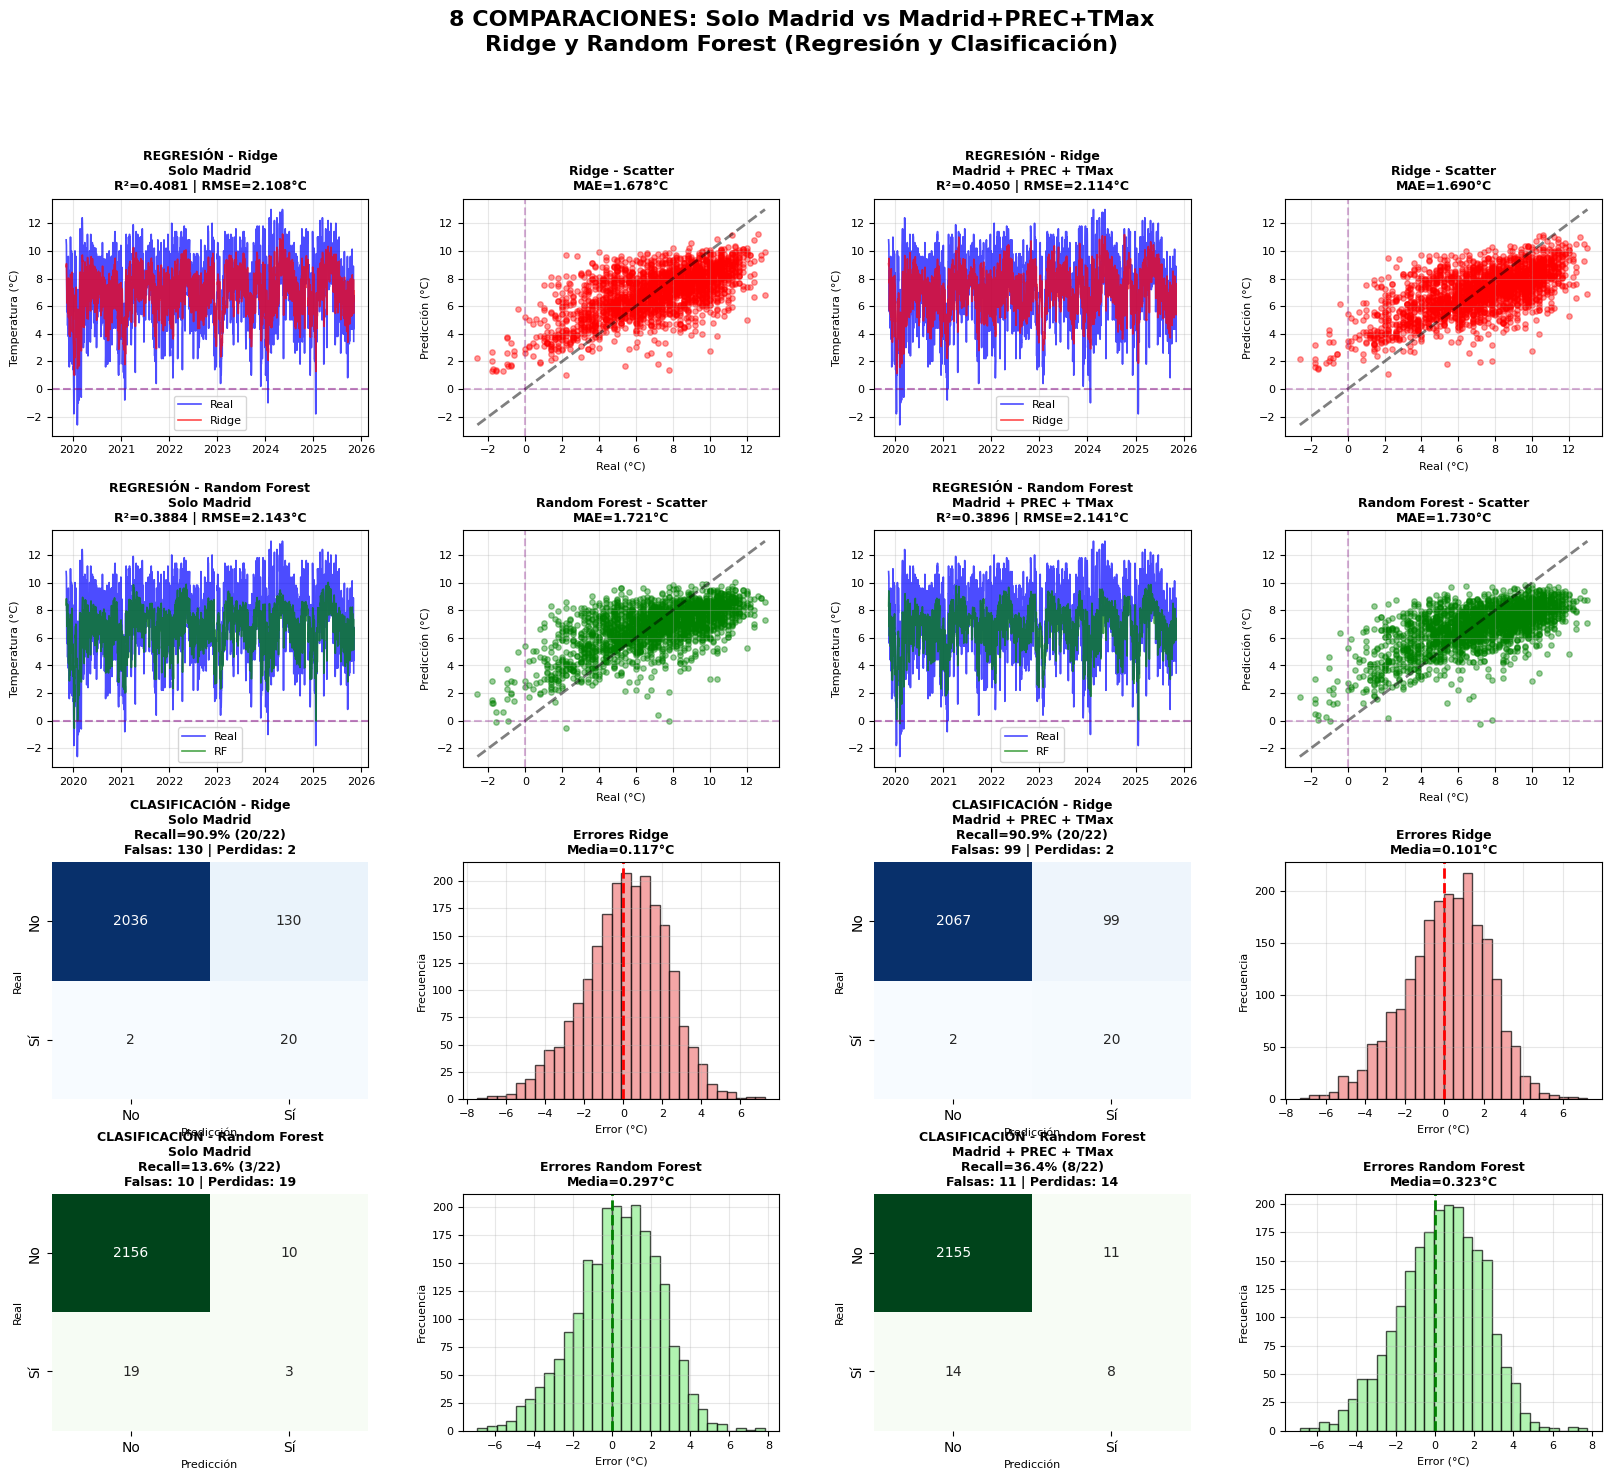

✔ Guardado: d:\Documentos\1especializacion\proyecto\proyecto_heladas_Madrid\visualizaciones\comparacion_8_graficos.png

📊 TOP 20 FEATURES MÁS IMPORTANTES (Enfoque 2 - Random Forest):
           Feature  Importancia
     PREC_promedio     0.137131
       TMIN_diff_1     0.073393
      TMIN_diff_30     0.062473
       TMIN_diff_7     0.047546
         TMIN_ma_3     0.034141
        TMIN_lag_1     0.022498
   TMax_TMin_ratio     0.022435
       TMIN_lag_30     0.021268
Rango_termico_lag1     0.021215
          PREC_max     0.018702
        TMIN_ma_30     0.017101
        TMIN_min_7     0.016062
         TMIN_ma_7     0.016025
        TMIN_lag_7     0.015714
        TMIN_ma_14     0.013211
        TMAX_ma_14     0.012396
  TMIN_aceleracion     0.011869
      PREC_suma_14     0.011519
       TMIN_q25_30     0.011513
       TMAX_diff_1     0.011351


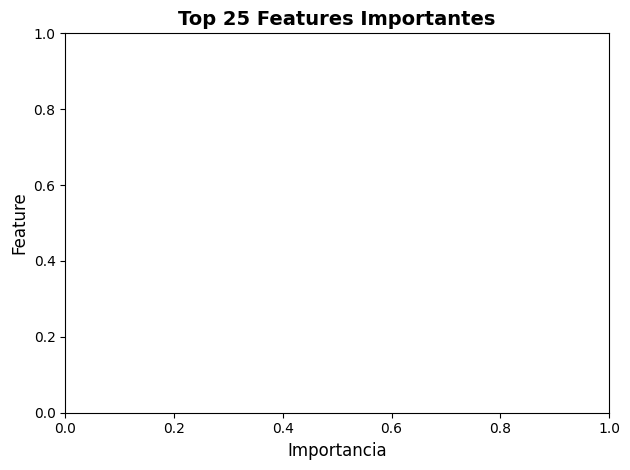

In [6]:
# ============================================================
#  SISTEMA UNIFICADO DE ALERTAS DE HELADAS - MADRID
#  Comparación: Solo Madrid vs Madrid + PREC + TMax
# ============================================================

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.linear_model import Ridge, LogisticRegression
from sklearn.metrics import (
    r2_score, mean_squared_error, mean_absolute_error,
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix
)
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# ============================================================
# CONFIGURACIÓN
# ============================================================
base_dir = Path.cwd()
datos_dir = base_dir / "Datos"
prediccion_dir = datos_dir / "datos_prediccion"
viz_dir = base_dir / "visualizaciones"

prediccion_dir.mkdir(parents=True, exist_ok=True)
viz_dir.mkdir(parents=True, exist_ok=True)

print("="*80)
print("🚨 SISTEMA UNIFICADO DE ALERTAS DE HELADAS - MADRID")
print("="*80)
print("\n📋 COMPARACIÓN DE 2 ENFOQUES:")
print("   1️⃣ Solo histórico de Madrid")
print("   2️⃣ Madrid + Precipitación + Temperatura Máxima")
print("\n🤖 MODELOS A COMPARAR:")
print("   • Ridge Regression")
print("   • Random Forest")
print("="*80)

# ============================================================
# CARGAR DATOS
# ============================================================
file_path = datos_dir / "datos_imputados" / "cundinamarca_imputado_v1.csv"
df = pd.read_csv(file_path)
df["Fecha"] = pd.to_datetime(df["Fecha"])

target = "TMin_21205880_FLORES_CHIBCHA_MADRID"

print(f"\n📊 DATOS CARGADOS:")
print(f"   Shape: {df.shape}")
print(f"   Target: {target}")
print(f"   Rango temperatura: [{df[target].min():.2f}°C, {df[target].max():.2f}°C]")
print(f"   Media: {df[target].mean():.2f}°C")

# Análisis de heladas
heladas_total = (df[target] <= 0).sum()
heladas_pct = (heladas_total / len(df)) * 100
print(f"\n❄️ ANÁLISIS DE HELADAS:")
print(f"   Total histórico: {heladas_total} ({heladas_pct:.2f}%)")
print(f"   Temperatura mínima: {df[target].min():.2f}°C")

# ============================================================
# FUNCIÓN: CREAR FEATURES AVANZADOS
# ============================================================
def crear_features_avanzados(df_input, target_col, incluir_prec_tmax=False, cols_prec=None, cols_tmax=None):
    """
    Crea features temporales y de rezago avanzados
    """
    df_out = df_input.copy()
    
    print(f"\n{'='*80}")
    print(f"🔧 CREANDO FEATURES {'CON PREC/TMax' if incluir_prec_tmax else 'SOLO MADRID'}")
    print(f"{'='*80}")
    
    # ============================================
    # 1. FEATURES TEMPORALES BÁSICOS
    # ============================================
    df_out['Año'] = df_out['Fecha'].dt.year
    df_out['Mes'] = df_out['Fecha'].dt.month
    df_out['DíaAño'] = df_out['Fecha'].dt.dayofyear
    df_out['Trimestre'] = df_out['Fecha'].dt.quarter
    df_out['DiaSemana'] = df_out['Fecha'].dt.dayofweek
    df_out['Semana'] = df_out['Fecha'].dt.isocalendar().week
    
    # ============================================
    # 2. FEATURES CÍCLICOS (ESTACIONALIDAD)
    # ============================================
    # Mes (ciclo anual)
    df_out['Mes_sin'] = np.sin(2 * np.pi * df_out['Mes'] / 12)
    df_out['Mes_cos'] = np.cos(2 * np.pi * df_out['Mes'] / 12)
    
    # Día del año (ciclo anual más fino)
    df_out['DíaAño_sin'] = np.sin(2 * np.pi * df_out['DíaAño'] / 365)
    df_out['DíaAño_cos'] = np.cos(2 * np.pi * df_out['DíaAño'] / 365)
    
    # Semana (ciclo semanal)
    df_out['Semana_sin'] = np.sin(2 * np.pi * df_out['Semana'] / 52)
    df_out['Semana_cos'] = np.cos(2 * np.pi * df_out['Semana'] / 52)
    
    # Día de la semana (ciclo semanal)
    df_out['DiaSemana_sin'] = np.sin(2 * np.pi * df_out['DiaSemana'] / 7)
    df_out['DiaSemana_cos'] = np.cos(2 * np.pi * df_out['DiaSemana'] / 7)
    
    print("✔ Features cíclicos creados (8 variables)")
    
    # ============================================
    # 3. REZAGOS SIMPLES DE MADRID
    # ============================================
    for lag in [1, 2, 3, 7, 14, 21, 30]:
        df_out[f'TMIN_lag_{lag}'] = df_out[target_col].shift(lag)
    
    print("✔ Rezagos simples: 7 variables (1, 2, 3, 7, 14, 21, 30 días)")
    
    # ============================================
    # 4. PROMEDIOS MÓVILES (con shift para evitar leakage)
    # ============================================
    for window in [3, 7, 14, 30]:
        df_out[f'TMIN_ma_{window}'] = df_out[target_col].shift(1).rolling(window=window).mean()
    
    print("✔ Promedios móviles: 4 variables (3, 7, 14, 30 días)")
    
    # ============================================
    # 5. DESVIACIONES ESTÁNDAR
    # ============================================
    for window in [3, 7, 14, 30]:
        df_out[f'TMIN_std_{window}'] = df_out[target_col].shift(1).rolling(window=window).std()
    
    print("✔ Desviaciones estándar: 4 variables")
    
    # ============================================
    # 6. MÍNIMOS Y MÁXIMOS
    # ============================================
    for window in [3, 7, 14, 30]:
        df_out[f'TMIN_min_{window}'] = df_out[target_col].shift(1).rolling(window=window).min()
        df_out[f'TMIN_max_{window}'] = df_out[target_col].shift(1).rolling(window=window).max()
    
    print("✔ Mínimos y máximos: 8 variables")
    
    # ============================================
    # 7. DIFERENCIAS (CAMBIOS)
    # ============================================
    df_out['TMIN_diff_1'] = df_out[target_col].diff(1)
    df_out['TMIN_diff_7'] = df_out[target_col].diff(7)
    df_out['TMIN_diff_30'] = df_out[target_col].diff(30)
    
    print("✔ Diferencias: 3 variables")
    
    # ============================================
    # 8. TENDENCIAS (PENDIENTES)
    # ============================================
    def calcular_tendencia(serie):
        if len(serie) < 5 or serie.isna().all():
            return 0
        x = np.arange(len(serie))
        y = serie.values
        try:
            coef = np.polyfit(x, y, 1)[0]
            return coef
        except:
            return 0
    
    for window in [7, 14, 30]:
        df_out[f'TMIN_tendencia_{window}'] = df_out[target_col].shift(1).rolling(window=window).apply(
            calcular_tendencia, raw=False
        )
    
    print("✔ Tendencias (pendientes): 3 variables")
    
    # ============================================
    # 9. RANGOS (VARIABILIDAD)
    # ============================================
    for window in [7, 14, 30]:
        df_out[f'TMIN_rango_{window}'] = (
            df_out[f'TMIN_max_{window}'] - df_out[f'TMIN_min_{window}']
        )
    
    print("✔ Rangos térmicos: 3 variables")
    
    # ============================================
    # 10. PERCENTILES
    # ============================================
    for window in [7, 14, 30]:
        df_out[f'TMIN_q25_{window}'] = df_out[target_col].shift(1).rolling(window=window).quantile(0.25)
        df_out[f'TMIN_q75_{window}'] = df_out[target_col].shift(1).rolling(window=window).quantile(0.75)
    
    print("✔ Percentiles (Q25, Q75): 6 variables")
    
    # ============================================
    # 11. ACELERACIÓN (CAMBIO DE TENDENCIA)
    # ============================================
    df_out['TMIN_aceleracion'] = df_out['TMIN_diff_1'].diff(1)
    
    print("✔ Aceleración: 1 variable")
    
    # ============================================
    # 12. PRECIPITACIÓN Y TMAX (si se incluyen)
    # ============================================
    if incluir_prec_tmax and cols_prec is not None and cols_tmax is not None:
        print(f"\n🌧️ AGREGANDO VARIABLES COMPLEMENTARIAS...")
        
        # --- PRECIPITACIÓN ---
        if len(cols_prec) > 0:
            # Rezagar precipitación (usar datos de ayer)
            for col in cols_prec:
                df_out[f'{col}_lag1'] = df_out[col].shift(1)
            
            # Promedio de precipitación
            cols_prec_lag = [f'{col}_lag1' for col in cols_prec]
            df_out['PREC_promedio'] = df_out[cols_prec_lag].mean(axis=1)
            df_out['PREC_max'] = df_out[cols_prec_lag].max(axis=1)
            df_out['PREC_std'] = df_out[cols_prec_lag].std(axis=1)
            
            # Rezagos de precipitación promedio
            for lag in [2, 3, 7]:
                df_out[f'PREC_promedio_lag{lag}'] = df_out['PREC_promedio'].shift(lag)
            
            # Suma acumulada de precipitación
            for window in [3, 7, 14]:
                df_out[f'PREC_suma_{window}'] = df_out['PREC_promedio'].shift(1).rolling(window=window).sum()
            
            print(f"   ✔ Precipitación: ~15 variables")
        
        # --- TEMPERATURA MÁXIMA ---
        if len(cols_tmax) > 0:
            # Rezagar TMax (usar datos de ayer)
            for col in cols_tmax:
                df_out[f'{col}_lag1'] = df_out[col].shift(1)
            
            # Promedio de TMax
            cols_tmax_lag = [f'{col}_lag1' for col in cols_tmax]
            df_out['TMAX_promedio'] = df_out[cols_tmax_lag].mean(axis=1)
            df_out['TMAX_std'] = df_out[cols_tmax_lag].std(axis=1)
            
            # Rango térmico diario (TMax - TMin del día anterior)
            df_out['Rango_termico_lag1'] = df_out['TMAX_promedio'] - df_out['TMIN_lag_1']
            
            # Promedios móviles de TMax
            for window in [3, 7, 14]:
                df_out[f'TMAX_ma_{window}'] = df_out['TMAX_promedio'].shift(1).rolling(window=window).mean()
            
            # Diferencias de TMax
            df_out['TMAX_diff_1'] = df_out['TMAX_promedio'].diff(1)
            
            print(f"   ✔ Temperatura máxima: ~10 variables")
        
        # --- INTERACCIONES ---
        # TMax alta + TMin baja = rango grande = cielos despejados = más heladas
        if 'TMAX_promedio' in df_out.columns and 'TMIN_lag_1' in df_out.columns:
            df_out['TMax_TMin_ratio'] = df_out['TMAX_promedio'] / (df_out['TMIN_lag_1'].abs() + 1)
        
        # PREC alta = menos heladas (nubes retienen calor)
        if 'PREC_promedio' in df_out.columns:
            df_out['PREC_binaria'] = (df_out['PREC_promedio'] > 0).astype(int)
        
        print(f"   ✔ Interacciones: 2 variables")
    
    # Eliminar columnas originales de PREC y TMax si existen
    if incluir_prec_tmax:
        for col in cols_prec + cols_tmax:
            if col in df_out.columns:
                df_out.drop(col, axis=1, inplace=True)
    
    # Eliminar NaN
    df_out = df_out.dropna().reset_index(drop=True)
    
    total_features = len([col for col in df_out.columns if col not in ['Fecha', target_col]])
    print(f"\n✅ TOTAL DE FEATURES CREADOS: {total_features}")
    print(f"   Dataset final: {df_out.shape}")
    
    return df_out

# ============================================================
# FUNCIÓN: ENTRENAR Y EVALUAR
# ============================================================
def entrenar_evaluar(df_modelo, target_col, nombre_enfoque):
    """
    Entrena modelos Ridge y Random Forest, evalúa regresión y clasificación
    """
    print(f"\n{'='*80}")
    print(f"🚀 ENTRENANDO ENFOQUE: {nombre_enfoque}")
    print(f"{'='*80}")
    
    # Crear target futuro
    df_modelo['TMIN_FUTURO'] = df_modelo[target_col].shift(-1)
    df_modelo['HELADA_FUTURO'] = (df_modelo['TMIN_FUTURO'] <= 0).astype(int)
    df_modelo = df_modelo[:-1].dropna().reset_index(drop=True)
    
    # Features
    feature_cols = [col for col in df_modelo.columns 
                    if col not in ['Fecha', target_col, 'TMIN_FUTURO', 'HELADA_FUTURO']]
    
    X = df_modelo[feature_cols]
    y_reg = df_modelo['TMIN_FUTURO']
    y_clf = df_modelo['HELADA_FUTURO']
    fechas = df_modelo['Fecha']
    
    print(f"\n📊 CONFIGURACIÓN:")
    print(f"   Features: {len(feature_cols)}")
    print(f"   Registros: {len(X)}")
    print(f"   Heladas: {y_clf.sum()} ({(y_clf.sum()/len(y_clf))*100:.2f}%)")
    
    # Split temporal (80/20)
    split_idx = int(len(X) * 0.8)
    X_train, X_test = X[:split_idx], X[split_idx:]
    y_train_reg, y_test_reg = y_reg[:split_idx], y_reg[split_idx:]
    y_train_clf, y_test_clf = y_clf[:split_idx], y_clf[split_idx:]
    fechas_test = fechas[split_idx:]
    
    # Escalar
    scaler = StandardScaler()
    X_train_s = scaler.fit_transform(X_train)
    X_test_s = scaler.transform(X_test)
    
    # ============================================
    # MODELOS DE REGRESIÓN
    # ============================================
    print(f"\n🤖 REGRESIÓN:")
    
    modelos_reg = {
        'Ridge': Ridge(alpha=1.0),
        'Random Forest': RandomForestRegressor(
            n_estimators=300,
            max_depth=15,
            min_samples_split=10,
            min_samples_leaf=5,
            random_state=42,
            n_jobs=-1
        )
    }
    
    resultados_reg = {}
    
    for nombre, modelo in modelos_reg.items():
        modelo.fit(X_train_s, y_train_reg)
        pred = modelo.predict(X_test_s)
        
        r2 = r2_score(y_test_reg, pred)
        rmse = np.sqrt(mean_squared_error(y_test_reg, pred))
        mae = mean_absolute_error(y_test_reg, pred)
        
        resultados_reg[nombre] = {
            'r2': r2, 'rmse': rmse, 'mae': mae, 'pred': pred, 'modelo': modelo
        }
        
        print(f"   {nombre:15s}: R²={r2:.4f} | RMSE={rmse:.4f}°C | MAE={mae:.4f}°C")
    
    # ============================================
    # CLASIFICADORES DE HELADAS
    # ============================================
    print(f"\n❄️ CLASIFICACIÓN:")
    
    from sklearn.linear_model import RidgeClassifier
    
    modelos_clf = {
        'Ridge': RidgeClassifier(alpha=1.0, random_state=42, class_weight='balanced'),
        'Random Forest': RandomForestClassifier(
            n_estimators=300,
            max_depth=15,
            random_state=42,
            class_weight='balanced',
            n_jobs=-1
        )
    }
    
    resultados_clf = {}
    
    for nombre, modelo in modelos_clf.items():
        modelo.fit(X_train_s, y_train_clf)
        pred = modelo.predict(X_test_s)
        
        acc = accuracy_score(y_test_clf, pred)
        prec = precision_score(y_test_clf, pred, zero_division=0)
        rec = recall_score(y_test_clf, pred, zero_division=0)
        f1 = f1_score(y_test_clf, pred, zero_division=0)
        cm = confusion_matrix(y_test_clf, pred)
        
        resultados_clf[nombre] = {
            'accuracy': acc, 'precision': prec, 'recall': rec, 'f1': f1,
            'cm': cm, 'pred': pred, 'modelo': modelo
        }
        
        heladas_detectadas = int(rec * y_test_clf.sum())
        print(f"   {nombre:20s}: Recall={rec:.4f} ({heladas_detectadas}/{y_test_clf.sum()}) | Precision={prec:.4f} | F1={f1:.4f}")
    
    # Mejor modelo de cada tipo (por R² y Recall)
    mejor_reg = max(resultados_reg.items(), key=lambda x: x[1]['r2'])
    mejor_clf = max(resultados_clf.items(), key=lambda x: x[1]['recall'])
    
    # Importancia de features (Random Forest)
    importancias = None
    if 'Random Forest' in resultados_reg:
        rf_modelo = resultados_reg['Random Forest']['modelo']
        importancias = pd.DataFrame({
            'Feature': feature_cols,
            'Importancia': rf_modelo.feature_importances_
        }).sort_values('Importancia', ascending=False)
    
    return {
        'nombre': nombre_enfoque,
        'features': len(feature_cols),
        'registros': len(X),
        'heladas_test': y_test_clf.sum(),
        'mejor_reg': mejor_reg,
        'mejor_clf': mejor_clf,
        'todos_reg': resultados_reg,
        'todos_clf': resultados_clf,
        'y_test_reg': y_test_reg,
        'y_test_clf': y_test_clf,
        'fechas_test': fechas_test,
        'importancias': importancias
    }

# ============================================================
# ENFOQUE 1: SOLO MADRID
# ============================================================
print(f"\n{'='*80}")
print("1️⃣ ENFOQUE 1: SOLO HISTÓRICO DE MADRID")
print(f"{'='*80}")

df_enfoque1 = df[['Fecha', target]].copy()
df_enfoque1 = df_enfoque1.dropna(subset=[target])
df_enfoque1 = crear_features_avanzados(df_enfoque1, target, incluir_prec_tmax=False)

resultados_e1 = entrenar_evaluar(df_enfoque1, target, "Solo Madrid")

# ============================================================
# ENFOQUE 2: MADRID + PREC + TMAX
# ============================================================
print(f"\n{'='*80}")
print("2️⃣ ENFOQUE 2: MADRID + PRECIPITACIÓN + TEMPERATURA MÁXIMA")
print(f"{'='*80}")

# Identificar columnas
columnas_prec = [col for col in df.columns if 'PREC' in col]
columnas_tmax = [col for col in df.columns if 'TMax' in col]

print(f"\n📍 Variables complementarias:")
print(f"   Precipitación: {len(columnas_prec)} estaciones")
print(f"   Temperatura máxima: {len(columnas_tmax)} estaciones")

df_enfoque2 = df[['Fecha', target] + columnas_prec + columnas_tmax].copy()
df_enfoque2 = df_enfoque2.dropna(subset=[target])

# Rellenar NaN en PREC y TMax
for col in columnas_prec + columnas_tmax:
    if df_enfoque2[col].isna().any():
        df_enfoque2[col].fillna(df_enfoque2[col].mean(), inplace=True)

df_enfoque2 = crear_features_avanzados(
    df_enfoque2, target,
    incluir_prec_tmax=True,
    cols_prec=columnas_prec,
    cols_tmax=columnas_tmax
)

resultados_e2 = entrenar_evaluar(df_enfoque2, target, "Madrid + PREC + TMax")

# ============================================================
# COMPARACIÓN FINAL
# ============================================================
print(f"\n{'='*80}")
print("📊 TABLA COMPARATIVA FINAL")
print(f"{'='*80}")

comparacion = pd.DataFrame([
    {
        'Enfoque': r['nombre'],
        'Features': r['features'],
        'R2_Ridge': r['todos_reg']['Ridge']['r2'],
        'RMSE_Ridge': r['todos_reg']['Ridge']['rmse'],
        'R2_RF': r['todos_reg']['Random Forest']['r2'],
        'RMSE_RF': r['todos_reg']['Random Forest']['rmse'],
        'Recall_Ridge_Clf': r['todos_clf']['Ridge']['recall'],
        'Recall_RF_Clf': r['todos_clf']['Random Forest']['recall'],
        'Heladas_Detectadas_Ridge': int(r['todos_clf']['Ridge']['recall'] * r['heladas_test']),
        'Heladas_Detectadas_RF': int(r['todos_clf']['Random Forest']['recall'] * r['heladas_test']),
        'Falsas_Alarmas_Ridge': r['todos_clf']['Ridge']['cm'][0,1],
        'Falsas_Alarmas_RF': r['todos_clf']['Random Forest']['cm'][0,1]
    }
    for r in [resultados_e1, resultados_e2]
])

print("\n" + comparacion.to_string(index=False))

# Guardar
comparacion.to_csv(prediccion_dir / 'comparacion_solo_madrid_vs_multivariable.csv', index=False)
print(f"\n✔ Guardado: {prediccion_dir / 'comparacion_solo_madrid_vs_multivariable.csv'}")

# ============================================================
# VISUALIZACIÓN COMPARATIVA (8 GRÁFICOS)
# ============================================================
print(f"\n{'='*80}")
print("📈 GENERANDO 8 COMPARACIONES")
print(f"{'='*80}")

fig = plt.figure(figsize=(20, 16))
gs = fig.add_gridspec(4, 4, hspace=0.4, wspace=0.3)

# Columnas: 0-1 = Solo Madrid, 2-3 = Madrid+PREC+TMax

for idx, resultado in enumerate([resultados_e1, resultados_e2]):
    col_base = idx * 2  # 0 para e1, 2 para e2
    
    # ============================================
    # FILA 1-2: REGRESIÓN (Temperatura)
    # ============================================
    
    # Ridge Regression
    ax = fig.add_subplot(gs[0, col_base])
    ax.plot(resultado['fechas_test'].values, resultado['y_test_reg'].values, 
            label='Real', alpha=0.7, linewidth=1.2, color='blue')
    ax.plot(resultado['fechas_test'].values, resultado['todos_reg']['Ridge']['pred'],
            label='Ridge', alpha=0.7, linewidth=1.2, color='red')
    ax.axhline(y=0, color='purple', linestyle='--', alpha=0.5)
    ax.set_title(f"REGRESIÓN - Ridge\n{resultado['nombre']}\nR²={resultado['todos_reg']['Ridge']['r2']:.4f} | RMSE={resultado['todos_reg']['Ridge']['rmse']:.3f}°C", 
                 fontweight='bold', fontsize=9)
    ax.legend(fontsize=8)
    ax.grid(True, alpha=0.3)
    ax.tick_params(labelsize=8)
    ax.set_ylabel('Temperatura (°C)', fontsize=8)
    
    # Random Forest Regression
    ax = fig.add_subplot(gs[1, col_base])
    ax.plot(resultado['fechas_test'].values, resultado['y_test_reg'].values,
            label='Real', alpha=0.7, linewidth=1.2, color='blue')
    ax.plot(resultado['fechas_test'].values, resultado['todos_reg']['Random Forest']['pred'],
            label='RF', alpha=0.7, linewidth=1.2, color='green')
    ax.axhline(y=0, color='purple', linestyle='--', alpha=0.5)
    ax.set_title(f"REGRESIÓN - Random Forest\n{resultado['nombre']}\nR²={resultado['todos_reg']['Random Forest']['r2']:.4f} | RMSE={resultado['todos_reg']['Random Forest']['rmse']:.3f}°C",
                 fontweight='bold', fontsize=9)
    ax.legend(fontsize=8)
    ax.grid(True, alpha=0.3)
    ax.tick_params(labelsize=8)
    ax.set_ylabel('Temperatura (°C)', fontsize=8)
    
    # ============================================
    # FILA 3-4: CLASIFICACIÓN (Heladas)
    # ============================================
    
    # Ridge Classifier
    ax = fig.add_subplot(gs[2, col_base])
    cm = resultado['todos_clf']['Ridge']['cm']
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax,
                xticklabels=['No', 'Sí'],
                yticklabels=['No', 'Sí'],
                cbar=False, annot_kws={'size': 10})
    rec = resultado['todos_clf']['Ridge']['recall']
    falsas_alarmas = cm[0, 1]
    heladas_perdidas = cm[1, 0]
    ax.set_title(f"CLASIFICACIÓN - Ridge\n{resultado['nombre']}\nRecall={rec:.1%} ({cm[1,1]}/{resultado['heladas_test']})\nFalsas: {falsas_alarmas} | Perdidas: {heladas_perdidas}",
                 fontweight='bold', fontsize=9)
    ax.set_ylabel('Real', fontsize=8)
    ax.set_xlabel('Predicción', fontsize=8)
    
    # Random Forest Classifier
    ax = fig.add_subplot(gs[3, col_base])
    cm = resultado['todos_clf']['Random Forest']['cm']
    sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', ax=ax,
                xticklabels=['No', 'Sí'],
                yticklabels=['No', 'Sí'],
                cbar=False, annot_kws={'size': 10})
    rec = resultado['todos_clf']['Random Forest']['recall']
    falsas_alarmas = cm[0, 1]
    heladas_perdidas = cm[1, 0]
    ax.set_title(f"CLASIFICACIÓN - Random Forest\n{resultado['nombre']}\nRecall={rec:.1%} ({cm[1,1]}/{resultado['heladas_test']})\nFalsas: {falsas_alarmas} | Perdidas: {heladas_perdidas}",
                 fontweight='bold', fontsize=9)
    ax.set_ylabel('Real', fontsize=8)
    ax.set_xlabel('Predicción', fontsize=8)
    
    # ============================================
    # COLUMNAS 1 y 3: SCATTER PLOTS
    # ============================================
    col_scatter = col_base + 1
    
    # Scatter Ridge
    ax = fig.add_subplot(gs[0, col_scatter])
    ax.scatter(resultado['y_test_reg'], resultado['todos_reg']['Ridge']['pred'], 
               alpha=0.4, s=15, color='red')
    lims = [resultado['y_test_reg'].min(), resultado['y_test_reg'].max()]
    ax.plot(lims, lims, 'k--', lw=2, alpha=0.5)
    ax.axhline(y=0, color='purple', linestyle='--', alpha=0.3)
    ax.axvline(x=0, color='purple', linestyle='--', alpha=0.3)
    ax.set_title(f"Ridge - Scatter\nMAE={resultado['todos_reg']['Ridge']['mae']:.3f}°C", 
                 fontweight='bold', fontsize=9)
    ax.set_xlabel('Real (°C)', fontsize=8)
    ax.set_ylabel('Predicción (°C)', fontsize=8)
    ax.grid(True, alpha=0.3)
    ax.tick_params(labelsize=8)
    
    # Scatter Random Forest
    ax = fig.add_subplot(gs[1, col_scatter])
    ax.scatter(resultado['y_test_reg'], resultado['todos_reg']['Random Forest']['pred'],
               alpha=0.4, s=15, color='green')
    ax.plot(lims, lims, 'k--', lw=2, alpha=0.5)
    ax.axhline(y=0, color='purple', linestyle='--', alpha=0.3)
    ax.axvline(x=0, color='purple', linestyle='--', alpha=0.3)
    ax.set_title(f"Random Forest - Scatter\nMAE={resultado['todos_reg']['Random Forest']['mae']:.3f}°C",
                 fontweight='bold', fontsize=9)
    ax.set_xlabel('Real (°C)', fontsize=8)
    ax.set_ylabel('Predicción (°C)', fontsize=8)
    ax.grid(True, alpha=0.3)
    ax.tick_params(labelsize=8)
    
    # Errores Ridge
    ax = fig.add_subplot(gs[2, col_scatter])
    errores = resultado['y_test_reg'].values - resultado['todos_reg']['Ridge']['pred']
    ax.hist(errores, bins=30, edgecolor='black', alpha=0.7, color='lightcoral')
    ax.axvline(0, color='r', linestyle='--', linewidth=2)
    ax.set_title(f"Errores Ridge\nMedia={errores.mean():.3f}°C", 
                 fontweight='bold', fontsize=9)
    ax.set_xlabel('Error (°C)', fontsize=8)
    ax.set_ylabel('Frecuencia', fontsize=8)
    ax.grid(True, alpha=0.3)
    ax.tick_params(labelsize=8)
    
    # Errores Random Forest
    ax = fig.add_subplot(gs[3, col_scatter])
    errores = resultado['y_test_reg'].values - resultado['todos_reg']['Random Forest']['pred']
    ax.hist(errores, bins=30, edgecolor='black', alpha=0.7, color='lightgreen')
    ax.axvline(0, color='g', linestyle='--', linewidth=2)
    ax.set_title(f"Errores Random Forest\nMedia={errores.mean():.3f}°C",
                 fontweight='bold', fontsize=9)
    ax.set_xlabel('Error (°C)', fontsize=8)
    ax.set_ylabel('Frecuencia', fontsize=8)
    ax.grid(True, alpha=0.3)
    ax.tick_params(labelsize=8)

plt.suptitle('8 COMPARACIONES: Solo Madrid vs Madrid+PREC+TMax\nRidge y Random Forest (Regresión y Clasificación)', 
             fontsize=16, fontweight='bold', y=0.998)
plt.savefig(viz_dir / 'comparacion_8_graficos.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"✔ Guardado: {viz_dir / 'comparacion_8_graficos.png'}")

# ============================================================
# IMPORTANCIA DE FEATURES (TOP 20)
# ============================================================
if resultados_e2['importancias'] is not None:
    print(f"\n📊 TOP 20 FEATURES MÁS IMPORTANTES (Enfoque 2 - Random Forest):")
    print(resultados_e2['importancias'].head(20).to_string(index=False))
    
    plt.xlabel('Importancia', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.title('Top 25 Features Importantes', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.savefig(viz_dir / 'importancia_features_alertas.png', dpi=300, bbox_inches='tight')
plt.show()


prediccion

In [7]:
# ============================================================
#  SISTEMA DE PREDICCIÓN EN TIEMPO REAL - HELADAS MADRID
# ============================================================

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge, RidgeClassifier
from pathlib import Path
import joblib
import warnings
warnings.filterwarnings("ignore")

# ============================================================
# CONFIGURACIÓN
# ============================================================
base_dir = Path.cwd()
datos_dir = base_dir / "Datos"
modelos_dir = datos_dir / "modelos_entrenados"
modelos_dir.mkdir(parents=True, exist_ok=True)

print("="*80)
print("🚨 SISTEMA DE PREDICCIÓN DE HELADAS - MADRID")
print("="*80)

# ============================================================
# 1. CARGAR Y PREPARAR DATOS
# ============================================================
file_path = datos_dir / "datos_imputados" / "cundinamarca_imputado_v1.csv"
df = pd.read_csv(file_path)
df["Fecha"] = pd.to_datetime(df["Fecha"])

target = "TMin_21205880_FLORES_CHIBCHA_MADRID"

print(f"\n📊 Cargando datos históricos...")
print(f"   Registros: {len(df)}")
print(f"   Período: {df['Fecha'].min().date()} a {df['Fecha'].max().date()}")

# Identificar columnas
columnas_prec = [col for col in df.columns if 'PREC' in col]
columnas_tmax = [col for col in df.columns if 'TMax' in col]

# ============================================================
# 2. FUNCIÓN PARA CREAR FEATURES
# ============================================================
def crear_features_completos(df_input, target_col, incluir_prec_tmax=False, 
                             cols_prec=None, cols_tmax=None):
    """
    Crea todos los features necesarios para predicción
    """
    df_out = df_input.copy()
    
    # Temporales
    df_out['Mes'] = df_out['Fecha'].dt.month
    df_out['DíaAño'] = df_out['Fecha'].dt.dayofyear
    df_out['Trimestre'] = df_out['Fecha'].dt.quarter
    df_out['DiaSemana'] = df_out['Fecha'].dt.dayofweek
    df_out['Semana'] = df_out['Fecha'].dt.isocalendar().week
    
    # Cíclicos
    df_out['Mes_sin'] = np.sin(2 * np.pi * df_out['Mes'] / 12)
    df_out['Mes_cos'] = np.cos(2 * np.pi * df_out['Mes'] / 12)
    df_out['DíaAño_sin'] = np.sin(2 * np.pi * df_out['DíaAño'] / 365)
    df_out['DíaAño_cos'] = np.cos(2 * np.pi * df_out['DíaAño'] / 365)
    df_out['Semana_sin'] = np.sin(2 * np.pi * df_out['Semana'] / 52)
    df_out['Semana_cos'] = np.cos(2 * np.pi * df_out['Semana'] / 52)
    df_out['DiaSemana_sin'] = np.sin(2 * np.pi * df_out['DiaSemana'] / 7)
    df_out['DiaSemana_cos'] = np.cos(2 * np.pi * df_out['DiaSemana'] / 7)
    
    # Rezagos
    for lag in [1, 2, 3, 7, 14, 21, 30]:
        df_out[f'TMIN_lag_{lag}'] = df_out[target_col].shift(lag)
    
    # Promedios móviles
    for window in [3, 7, 14, 30]:
        df_out[f'TMIN_ma_{window}'] = df_out[target_col].shift(1).rolling(window=window).mean()
        df_out[f'TMIN_std_{window}'] = df_out[target_col].shift(1).rolling(window=window).std()
        df_out[f'TMIN_min_{window}'] = df_out[target_col].shift(1).rolling(window=window).min()
        df_out[f'TMIN_max_{window}'] = df_out[target_col].shift(1).rolling(window=window).max()
    
    # Diferencias
    df_out['TMIN_diff_1'] = df_out[target_col].diff(1)
    df_out['TMIN_diff_7'] = df_out[target_col].diff(7)
    df_out['TMIN_diff_30'] = df_out[target_col].diff(30)
    
    # Tendencias
    def calcular_tendencia(serie):
        if len(serie) < 5 or serie.isna().all():
            return 0
        try:
            x = np.arange(len(serie))
            y = serie.values
            coef = np.polyfit(x, y, 1)[0]
            return coef
        except:
            return 0
    
    for window in [7, 14, 30]:
        df_out[f'TMIN_tendencia_{window}'] = df_out[target_col].shift(1).rolling(window=window).apply(
            calcular_tendencia, raw=False
        )
    
    # Rangos
    for window in [7, 14, 30]:
        df_out[f'TMIN_rango_{window}'] = df_out[f'TMIN_max_{window}'] - df_out[f'TMIN_min_{window}']
    
    # Percentiles
    for window in [7, 14, 30]:
        df_out[f'TMIN_q25_{window}'] = df_out[target_col].shift(1).rolling(window=window).quantile(0.25)
        df_out[f'TMIN_q75_{window}'] = df_out[target_col].shift(1).rolling(window=window).quantile(0.75)
    
    # Aceleración
    df_out['TMIN_aceleracion'] = df_out['TMIN_diff_1'].diff(1)
    
    # PREC y TMax si se incluyen
    if incluir_prec_tmax and cols_prec is not None and cols_tmax is not None:
        # Precipitación
        if len(cols_prec) > 0:
            for col in cols_prec:
                df_out[f'{col}_lag1'] = df_out[col].shift(1)
            
            cols_prec_lag = [f'{col}_lag1' for col in cols_prec]
            df_out['PREC_promedio'] = df_out[cols_prec_lag].mean(axis=1)
            df_out['PREC_max'] = df_out[cols_prec_lag].max(axis=1)
            df_out['PREC_std'] = df_out[cols_prec_lag].std(axis=1)
            
            for lag in [2, 3, 7]:
                df_out[f'PREC_promedio_lag{lag}'] = df_out['PREC_promedio'].shift(lag)
            
            for window in [3, 7, 14]:
                df_out[f'PREC_suma_{window}'] = df_out['PREC_promedio'].shift(1).rolling(window=window).sum()
        
        # Temperatura máxima
        if len(cols_tmax) > 0:
            for col in cols_tmax:
                df_out[f'{col}_lag1'] = df_out[col].shift(1)
            
            cols_tmax_lag = [f'{col}_lag1' for col in cols_tmax]
            df_out['TMAX_promedio'] = df_out[cols_tmax_lag].mean(axis=1)
            df_out['TMAX_std'] = df_out[cols_tmax_lag].std(axis=1)
            df_out['Rango_termico_lag1'] = df_out['TMAX_promedio'] - df_out['TMIN_lag_1']
            
            for window in [3, 7, 14]:
                df_out[f'TMAX_ma_{window}'] = df_out['TMAX_promedio'].shift(1).rolling(window=window).mean()
            
            df_out['TMAX_diff_1'] = df_out['TMAX_promedio'].diff(1)
        
        # Interacciones
        if 'TMAX_promedio' in df_out.columns and 'TMIN_lag_1' in df_out.columns:
            df_out['TMax_TMin_ratio'] = df_out['TMAX_promedio'] / (df_out['TMIN_lag_1'].abs() + 1)
        
        if 'PREC_promedio' in df_out.columns:
            df_out['PREC_binaria'] = (df_out['PREC_promedio'] > 0).astype(int)
        
        # Eliminar columnas originales
        for col in cols_prec + cols_tmax:
            if col in df_out.columns:
                df_out.drop(col, axis=1, inplace=True)
    
    df_out = df_out.dropna().reset_index(drop=True)
    return df_out

# ============================================================
# 3. ENTRENAR MODELOS
# ============================================================
print(f"\n{'='*80}")
print("🤖 ENTRENANDO MODELOS")
print(f"{'='*80}")

# MODELO 1: Ridge para temperatura (Solo Madrid)
print("\n1️⃣ Modelo de Temperatura (Ridge - Solo Madrid)...")
df_temp = df[['Fecha', target]].copy().dropna(subset=[target])
df_temp = crear_features_completos(df_temp, target, incluir_prec_tmax=False)

df_temp['TMIN_FUTURO'] = df_temp[target].shift(-1)
df_temp = df_temp[:-1].dropna().reset_index(drop=True)

features_temp = [col for col in df_temp.columns if col not in ['Fecha', target, 'TMIN_FUTURO']]
X_temp = df_temp[features_temp]
y_temp = df_temp['TMIN_FUTURO']

split_idx = int(len(X_temp) * 0.9)  # 90% para entrenar (más datos)
X_train_temp = X_temp[:split_idx]
y_train_temp = y_temp[:split_idx]

scaler_temp = StandardScaler()
X_train_temp_s = scaler_temp.fit_transform(X_train_temp)

modelo_temperatura = Ridge(alpha=1.0)
modelo_temperatura.fit(X_train_temp_s, y_train_temp)

print(f"   ✔ Modelo temperatura entrenado con {len(X_train_temp)} registros")
print(f"   ✔ Features: {len(features_temp)}")

# MODELO 2: Ridge Classifier para heladas (Madrid + PREC + TMax)
print("\n2️⃣ Modelo de Heladas (Ridge Classifier - Madrid+PREC+TMax)...")
df_helada = df[['Fecha', target] + columnas_prec + columnas_tmax].copy()
df_helada = df_helada.dropna(subset=[target])

for col in columnas_prec + columnas_tmax:
    if df_helada[col].isna().any():
        df_helada[col].fillna(df_helada[col].mean(), inplace=True)

df_helada = crear_features_completos(df_helada, target, incluir_prec_tmax=True,
                                    cols_prec=columnas_prec, cols_tmax=columnas_tmax)

df_helada['HELADA_FUTURO'] = (df_helada[target].shift(-1) <= 0).astype(int)
df_helada = df_helada[:-1].dropna().reset_index(drop=True)

features_helada = [col for col in df_helada.columns if col not in ['Fecha', target, 'HELADA_FUTURO']]
X_helada = df_helada[features_helada]
y_helada = df_helada['HELADA_FUTURO']

split_idx = int(len(X_helada) * 0.9)
X_train_helada = X_helada[:split_idx]
y_train_helada = y_helada[:split_idx]

scaler_helada = StandardScaler()
X_train_helada_s = scaler_helada.fit_transform(X_train_helada)

modelo_helada = RidgeClassifier(alpha=1.0, random_state=42, class_weight='balanced')
modelo_helada.fit(X_train_helada_s, y_train_helada)

print(f"   ✔ Modelo heladas entrenado con {len(X_train_helada)} registros")
print(f"   ✔ Features: {len(features_helada)}")

# ============================================================
# 4. GUARDAR MODELOS Y SCALERS
# ============================================================
print(f"\n{'='*80}")
print("💾 GUARDANDO MODELOS")
print(f"{'='*80}")

joblib.dump(modelo_temperatura, modelos_dir / 'modelo_temperatura_ridge.pkl')
joblib.dump(scaler_temp, modelos_dir / 'scaler_temperatura.pkl')
joblib.dump(features_temp, modelos_dir / 'features_temperatura.pkl')

joblib.dump(modelo_helada, modelos_dir / 'modelo_helada_ridge.pkl')
joblib.dump(scaler_helada, modelos_dir / 'scaler_helada.pkl')
joblib.dump(features_helada, modelos_dir / 'features_helada.pkl')

print(f"✔ Modelos guardados en: {modelos_dir}")

# ============================================================
# 5. FUNCIÓN DE PREDICCIÓN
# ============================================================
def predecir_helada(fecha_consulta=None):
    """
    Predice temperatura y probabilidad de helada para mañana
    """
    # Cargar modelos
    modelo_temp = joblib.load(modelos_dir / 'modelo_temperatura_ridge.pkl')
    scaler_temp = joblib.load(modelos_dir / 'scaler_temperatura.pkl')
    features_temp = joblib.load(modelos_dir / 'features_temperatura.pkl')
    
    modelo_hel = joblib.load(modelos_dir / 'modelo_helada_ridge.pkl')
    scaler_hel = joblib.load(modelos_dir / 'scaler_helada.pkl')
    features_hel = joblib.load(modelos_dir / 'features_helada.pkl')
    
    # Cargar datos
    df = pd.read_csv(datos_dir / "datos_imputados" / "cundinamarca_imputado_v1.csv")
    df["Fecha"] = pd.to_datetime(df["Fecha"])
    
    # Si no se especifica fecha, usar la última disponible
    if fecha_consulta is None:
        fecha_consulta = df['Fecha'].max()
    else:
        fecha_consulta = pd.to_datetime(fecha_consulta)
    
    # Filtrar hasta la fecha de consulta
    df_hasta_hoy = df[df['Fecha'] <= fecha_consulta].copy()
    
    if len(df_hasta_hoy) < 50:
        return {"error": "No hay suficientes datos históricos"}
    
    # ============================================
    # PREDICCIÓN DE TEMPERATURA
    # ============================================
    df_pred_temp = df_hasta_hoy[['Fecha', target]].copy().dropna(subset=[target])
    df_pred_temp = crear_features_completos(df_pred_temp, target, incluir_prec_tmax=False)
    
    if len(df_pred_temp) == 0:
        return {"error": "No se pudieron crear features"}
    
    ultima_fila_temp = df_pred_temp.iloc[[-1]]
    X_pred_temp = ultima_fila_temp[features_temp]
    X_pred_temp_s = scaler_temp.transform(X_pred_temp)
    
    temp_predicha = modelo_temp.predict(X_pred_temp_s)[0]
    
    # ============================================
    # PREDICCIÓN DE HELADA
    # ============================================
    columnas_prec = [col for col in df.columns if 'PREC' in col]
    columnas_tmax = [col for col in df.columns if 'TMax' in col]
    
    df_pred_hel = df_hasta_hoy[['Fecha', target] + columnas_prec + columnas_tmax].copy()
    df_pred_hel = df_pred_hel.dropna(subset=[target])
    
    for col in columnas_prec + columnas_tmax:
        if df_pred_hel[col].isna().any():
            df_pred_hel[col].fillna(df_pred_hel[col].mean(), inplace=True)
    
    df_pred_hel = crear_features_completos(df_pred_hel, target, incluir_prec_tmax=True,
                                          cols_prec=columnas_prec, cols_tmax=columnas_tmax)
    
    if len(df_pred_hel) == 0:
        return {"error": "No se pudieron crear features para helada"}
    
    ultima_fila_hel = df_pred_hel.iloc[[-1]]
    X_pred_hel = ultima_fila_hel[features_hel]
    X_pred_hel_s = scaler_hel.transform(X_pred_hel)
    
    # Decision function da un score continuo
    score_helada = modelo_hel.decision_function(X_pred_hel_s)[0]
    
    # Convertir a probabilidad (0-100%)
    # Score positivo = helada, negativo = no helada
    # Normalizar a rango 0-100
    probabilidad_helada = 1 / (1 + np.exp(-score_helada))  # Sigmoid
    probabilidad_helada = probabilidad_helada * 100
    
    # Clasificación
    helada_predicha = 1 if score_helada > 0 else 0
    
    # ============================================
    # DETERMINAR RIESGO
    # ============================================
    if temp_predicha <= -2:
        riesgo = "MUY ALTO"
        emoji_riesgo = "🔴"
    elif temp_predicha <= 0:
        riesgo = "ALTO"
        emoji_riesgo = "🟠"
    elif temp_predicha <= 2:
        riesgo = "MEDIO"
        emoji_riesgo = "🟡"
    elif temp_predicha <= 4:
        riesgo = "BAJO"
        emoji_riesgo = "🟢"
    else:
        riesgo = "MUY BAJO"
        emoji_riesgo = "🟢"
    
    # Datos adicionales
    temp_ayer = df_hasta_hoy[target].iloc[-1]
    temp_promedio_7d = df_hasta_hoy[target].iloc[-7:].mean()
    
    return {
        "fecha_consulta": fecha_consulta.date(),
        "fecha_prediccion": (fecha_consulta + pd.Timedelta(days=1)).date(),
        "temperatura_predicha": temp_predicha,
        "probabilidad_helada": probabilidad_helada,
        "helada_predicha": helada_predicha,
        "riesgo": riesgo,
        "emoji_riesgo": emoji_riesgo,
        "temp_ayer": temp_ayer,
        "temp_promedio_7d": temp_promedio_7d
    }

# ============================================================
# 6. FUNCIÓN PARA MOSTRAR PREDICCIÓN BONITA
# ============================================================
def mostrar_prediccion(resultado):
    """
    Muestra la predicción en formato elegante
    """
    if "error" in resultado:
        print(f"❌ ERROR: {resultado['error']}")
        return
    
    print("\n" + "="*80)
    print(f"📅 PREDICCIÓN PARA: {resultado['fecha_prediccion']}")
    print(f"   (Basado en datos hasta: {resultado['fecha_consulta']})")
    print("="*80)
    
    print(f"\n🌡  Temperatura mínima esperada: {resultado['temperatura_predicha']:.2f} °C")
    print(f"❄  Probabilidad de helada: {resultado['probabilidad_helada']:.1f}%")
    print(f"🔎 Riesgo: {resultado['emoji_riesgo']} {resultado['riesgo']}")
    
    if resultado['helada_predicha'] == 1:
        print(f"\n⚠️  ALERTA: Se espera HELADA mañana")
        print(f"   Recomendación: Activar medidas de protección de cultivos")
    else:
        print(f"\n✅ NO se espera helada mañana")
        print(f"   Condiciones normales de operación")
    
    print(f"\n📊 CONTEXTO:")
    print(f"   Temperatura de ayer: {resultado['temp_ayer']:.2f} °C")
    print(f"   Promedio últimos 7 días: {resultado['temp_promedio_7d']:.2f} °C")
    print(f"   Cambio esperado: {resultado['temperatura_predicha'] - resultado['temp_ayer']:+.2f} °C")
    
    print("\n" + "="*80)

# ============================================================
# 7. EJEMPLOS DE USO
# ============================================================
print(f"\n{'='*80}")
print("🔮 EJEMPLOS DE PREDICCIÓN")
print(f"{'='*80}")

# Ejemplo 1: Última fecha disponible
print("\n1️⃣ Predicción para la última fecha disponible:")
resultado1 = predecir_helada()
mostrar_prediccion(resultado1)

# Ejemplo 2: Fecha específica (ejemplo: 2024-01-15)
print("\n2️⃣ Predicción para una fecha específica (2024-01-15):")
resultado2 = predecir_helada('2024-01-15')
mostrar_prediccion(resultado2)

# Ejemplo 3: Múltiples predicciones
print(f"\n{'='*80}")
print("📊 ÚLTIMAS 5 PREDICCIONES")
print(f"{'='*80}")

fechas_ejemplo = pd.date_range(end=df['Fecha'].max(), periods=5, freq='D')
predicciones = []

for fecha in fechas_ejemplo:
    res = predecir_helada(fecha)
    if "error" not in res:
        predicciones.append({
            'Fecha_Prediccion': res['fecha_prediccion'],
            'Temp_Predicha': f"{res['temperatura_predicha']:.2f}°C",
            'Prob_Helada': f"{res['probabilidad_helada']:.1f}%",
            'Riesgo': f"{res['emoji_riesgo']} {res['riesgo']}",
            'Alerta': '⚠️ SÍ' if res['helada_predicha'] == 1 else '✅ NO'
        })

df_predicciones = pd.DataFrame(predicciones)
print("\n" + df_predicciones.to_string(index=False))

print(f"\n{'='*80}")
print("✅ SISTEMA DE PREDICCIÓN LISTO")
print(f"{'='*80}")
print(f"\n📝 CÓMO USAR:")
print(f"   1. resultado = predecir_helada()  # Última fecha")
print(f"   2. resultado = predecir_helada('2024-01-20')  # Fecha específica")
print(f"   3. mostrar_prediccion(resultado)")
print(f"\n💾 Modelos guardados en: {modelos_dir}")
print("="*80)

🚨 SISTEMA DE PREDICCIÓN DE HELADAS - MADRID

📊 Cargando datos históricos...
   Registros: 10971
   Período: 1995-10-26 a 2025-11-07

🤖 ENTRENANDO MODELOS

1️⃣ Modelo de Temperatura (Ridge - Solo Madrid)...
   ✔ Modelo temperatura entrenado con 9846 registros
   ✔ Features: 52

2️⃣ Modelo de Heladas (Ridge Classifier - Madrid+PREC+TMax)...
   ✔ Modelo heladas entrenado con 9846 registros
   ✔ Features: 78

💾 GUARDANDO MODELOS
✔ Modelos guardados en: d:\Documentos\1especializacion\proyecto\proyecto_heladas_Madrid\Datos\modelos_entrenados

🔮 EJEMPLOS DE PREDICCIÓN

1️⃣ Predicción para la última fecha disponible:

📅 PREDICCIÓN PARA: 2025-11-08
   (Basado en datos hasta: 2025-11-07)

🌡  Temperatura mínima esperada: 4.96 °C
❄  Probabilidad de helada: 34.2%
🔎 Riesgo: 🟢 MUY BAJO

✅ NO se espera helada mañana
   Condiciones normales de operación

📊 CONTEXTO:
   Temperatura de ayer: 3.45 °C
   Promedio últimos 7 días: 5.91 °C
   Cambio esperado: +1.51 °C


2️⃣ Predicción para una fecha específic